Trabalho - Unidade 02
===

Identificação dos alunos (nome completo):



**Bruno Silvino Matias**

- Este trabalho irá compor 60% da segunda unidade
- Grupo de até dois alunos
- Os alunos deverão enviar (apenas um por grupo) através do Sigaa, o notebook e os datasets gerados na avaliação em um arquivo compactado (.zip)
- Todas as respostas devem ser realizadas através de código python e os resultados explicados em estilo markdown
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino


In [228]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr

%matplotlib inline

turmas = pd.read_csv('turmas-2017.1.csv', sep=';')
matriculas = pd.read_csv('matricula-componente-20171.csv', sep=';')
componentes = pd.read_csv('componentes-curriculares-presenciais.csv', sep=';')


Verificando todas turmas IMD e todas as turmas consolidadas.

In [67]:
imd = componentes[(componentes['codigo'].str.contains('IMD'))]
turmas_consol = turmas[(turmas['situacao_turma'].str.contains ('CONSOLIDADA')) ]


imd.head()
#consol.head()

,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,ch_total,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
17834,51954,MODULO,IMD0001,L,INOVAÇÃO TECNOLÓGICA,INSTITUTO METROPOLE DIGITAL,15,0,0,15,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,RESIDÊNCIA EM ENGENHARIA DE SOFTWARE
18093,52247,MODULO,IMD0002,L,INOVAÇÃO TECNOLÓGICA,INSTITUTO METROPOLE DIGITAL,30,0,0,30,...,Conceito de inovação. Tipos de inovação. Relaç...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,RESIDÊNCIA EM ENGENHARIA DE SOFTWARE
18094,52248,MODULO,IMD0003,L,PROCESSO E QUALIDADE DE SOFTWARE,INSTITUTO METROPOLE DIGITAL,30,0,0,30,...,Modelos e Processos de Software utilizados no ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,RESIDÊNCIA EM ENGENHARIA DE SOFTWARE
18095,52249,MODULO,IMD0004,L,GERÊNCIA DE PROJETOS,INSTITUTO METROPOLE DIGITAL,30,0,0,30,...,Planejamento de projetos. Balanced Scorecard. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,RESIDÊNCIA EM ENGENHARIA DE SOFTWARE
18235,52390,MODULO,IMD0005,L,INOVAÇÃO TECNOLÓGICA,INSTITUTO METROPOLE DIGITAL,15,0,0,15,...,Conceito de inovação. Tipos de inovação. Relaç...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,RESIDÊNCIA EM ENGENHARIA DE SOFTWARE


<h3>I Criar gráfico Z-score com área colorida:</h3>

O Z-Score mede o quanto a medida se afasta da média em em referencia ao <i>Desvio Padrão</i>. <b>Z-Score +<b> os valores estão acima da média. <b>Z-Score -</b>os valores estão abaixo da média. Os Valores oscilam entre -3 e 3 o qu representa 99,72% da área total da curva de Distribuição da Normal.
    

vERIFICANDO TURMAS

In [68]:
len(imd)

374

In [69]:
#imd.head(374)
imd1 = imd[(imd['nome'].str.contains('FUNDAMENTOS MATE'))]
imd1


,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,ch_total,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
18502,52659,MODULO,IMD0023,G,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO,INSTITUTO METROPOLE DIGITAL,60,30,0,90,...,T0. Conteúdo transversal: (i) linguagem da mat...,NaN,Proporcionar ao aluno as bases matemáticas nec...,"1. Métodos de demonstração: construtiva, exist...","conhecimentos matemáticos básicos, habilidade ...",NaN,2013.0,1.0,Presencial,TECNOLOGIA DA INFORMAÇÃO
18503,52660,MODULO,IMD0023.0,G,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO,INSTITUTO METROPOLE DIGITAL,60,0,0,60,...,T0. Conteúdo transversal: (i) linguagem da mat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
18504,52661,MODULO,IMD0023.1,G,PRÁTICAS DE FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO,INSTITUTO METROPOLE DIGITAL,30,0,0,30,...,Aplicações práticas de: T0. Conteúdo transvers...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
20538,55022,MODULO,IMD0028,G,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I,INSTITUTO METROPOLE DIGITAL,60,30,0,90,...,Conteúdo transversal: a linguagem da matemátic...,NaN,Capacitar o aluno a compreender e utilizar ade...,0. Conteúdo transversal: (i) a linguagem da ma...,Desenvolver no aluno a habilidade de entender...,NaN,2013.0,2.0,Presencial,TECNOLOGIA DA INFORMAÇÃO
20541,55025,MODULO,IMD0038,G,FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II,INSTITUTO METROPOLE DIGITAL,60,30,0,90,...,T0. Conteúdo transversal: (i) linguagem da mat...,NaN,Proporcionar ao aluno as bases matemáticas nec...,"1. Métodos de demonstração: construtiva, exist...","conhecimentos matemáticos básicos, habilidade ...",NaN,2013.0,2.0,Presencial,TECNOLOGIA DA INFORMAÇÃO


<h4>Verificar id da Unidade 1 - Turma imd0033 / imd0028 e imd0028</h4>

In [70]:
verificar_turmas_prob = imd[(imd['nome'].str.contains('PROBABILIDADE'))]
verificar_turmas_fmci = imd[(imd['nome'] == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I')]
verificar_turmas_fmcii = imd[(imd['nome'] == 'FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II')]

In [71]:
print(verificar_turmas_fmci,verificar_turmas_fmcii,verificar_turmas_prob)

(       id_componente tipo_componente   codigo nivel  \
20538          55022          MODULO  IMD0028     G   

                                          nome          unidade_responsavel  \
20538  FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I  INSTITUTO METROPOLE DIGITAL   

       ch_teorico  ch_pratico  ch_estagio  ch_total            ...             \
20538          60          30           0        90            ...              

                                                  ementa  bibliografia  \
20538  Conteúdo transversal: a linguagem da matemátic...           NaN   

                                               objetivos  \
20538  Capacitar o aluno a compreender e utilizar ade...   

                                                conteudo  \
20538  0. Conteúdo transversal: (i) a linguagem da ma...   

                                competencias_habilidades referencias  \
20538   Desenvolver no aluno a habilidade de entender...         NaN   

      ano_programa periodo_pro

<h5>Criando id_componente_curricular das turmas</h5>

In [72]:
turmas_imd0033 = verificar_turmas_prob['id_componente'][
    verificar_turmas_prob['codigo'] == 'IMD0033'].unique()

turmas_imd0028 = verificar_turmas_fmci['id_componente'][
    verificar_turmas_fmci['codigo'] == 'IMD0028'].unique()

turmas_imd0038 = verificar_turmas_fmcii['id_componente'][
    verificar_turmas_fmcii['codigo'] == 'IMD0038'].unique()
print(turmas_imd0033, turmas_imd0028, turmas_imd0038)


#turmas_imd00

(array([52664], dtype=int64), array([55022], dtype=int64), array([55025], dtype=int64))


<h3> Verificando Turmas através do código extraído do Data Frame <i>componentes</i></h3>

In [73]:
ver_tconsol_imd0033 = turmas_consol[(turmas_consol['id_componente_curricular'].isin(turmas_imd0033))]
ver_tconsol_imd0028 = turmas_consol[(turmas_consol['id_componente_curricular'].isin(turmas_imd0028))]
ver_tconsol_imd0038 = turmas_consol[(turmas_consol['id_componente_curricular'].isin(turmas_imd0038))]

print(ver_tconsol_imd0028,ver_tconsol_imd0033, ver_tconsol_imd0038)
print('quantidade de turmas')
print(len(ver_tconsol_imd0028)
,len(ver_tconsol_imd0033),
len(ver_tconsol_imd0038))

(      id_turma codigo_turma  id_docente_interno  id_docente_externo  \
5570  57597592           01           5755388.0                 NaN   
9870  57600129           04           5757669.0                 NaN   
9871  57600130           05           5756813.0                 NaN   

     observacao  id_componente_curricular nivel_ensino    campus_turma  \
5570        NaN                     55022    GRADUAÇÃO  Campus Central   
9870        NaN                     55022    GRADUAÇÃO  Campus Central   
9871        NaN                     55022    GRADUAÇÃO  Campus Central   

            local   ano     ...         tipo distancia  \
5570  A306 - CIVT  2017     ...      REGULAR         f   
9870  CIVT - A306  2017     ...      REGULAR         f   
9871  CIVT - A306  2017     ...      REGULAR         f   

            data_consolidacao agrupadora  id_turma_agrupadora  \
5570  2017-07-07 17:40:45.318          f                  NaN   
9870  2017-07-07 18:40:36.511          f              

<h3>Especificando id_turmas
para extrair dados do Data Frame <i>matricula-componente-20171<i></h3>

In [74]:
id_turmas_imd0028 = ver_tconsol_imd0028['id_turma'].unique()
id_turmas_imd0033 = ver_tconsol_imd0033['id_turma'].unique()
id_turmas_imd0038 = ver_tconsol_imd0038['id_turma'].unique()
print(id_turmas_imd0028, 
      "////",id_turmas_imd0033,"////", id_turmas_imd0038)


(array([57597592, 57600129, 57600130], dtype=int64), '////', array([57597912, 57597913], dtype=int64), '////', array([57597922, 57597928], dtype=int64))


Retirando do DAta Frame Matriculas; alunos Cancelados, indeferidos, excluídos e desistes e notas com campos vazios.

In [75]:
drop_matriculas= matriculas[
    (matriculas['descricao'] != 'CANCELADO') & 
     (matriculas['descricao']!='EXCLUIDA')& (matriculas['descricao']!='DESISTENCIA')
& (matriculas['descricao']!='TRANCADO')
    ].dropna(subset=['nota'])
drop_matriculas.head()

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao
0,57600868,a4a014ab217b40735e3caef890a56eee,4970.0,1.0,0.0,f,0.0,0.0,0.0,REPROVADO
1,57600868,a4a014ab217b40735e3caef890a56eee,4970.0,2.0,0.0,f,0.0,0.0,0.0,REPROVADO
2,57600868,89dba505ee16aab34cd076ab247459fa,4970.0,1.0,0.0,f,0.0,0.0,0.0,REPROVADO
3,57600868,89dba505ee16aab34cd076ab247459fa,4970.0,2.0,0.0,f,0.0,0.0,0.0,REPROVADO
4,57600868,7a75a77e86769d8f30da31e0818d51fe,5400.0,1.0,9.0,f,0.0,9.0,0.0,APROVADO


<h4> Criando Data set com alunos das turmas especificas e quantidade de</h4>

In [76]:
alunos_imd0028 = drop_matriculas[(drop_matriculas['id_turma'].isin(id_turmas_imd0028))]
alunos_imd0033 = drop_matriculas[(drop_matriculas['id_turma'].isin(id_turmas_imd0033))]
alunos_imd0038 = drop_matriculas[(drop_matriculas['id_turma'].isin(id_turmas_imd0038))]
#teste
print(alunos_imd0028,
     alunos_imd0033,
    alunos_imd0038)


(        id_turma                          discente    id_curso  unidade  nota  \
208191  57600130  51a920b9ab104a241c04fe06fcd5351d  92127264.0      3.0   0.0   
208192  57600130  51a920b9ab104a241c04fe06fcd5351d  92127264.0      2.0   2.7   
208193  57600130  51a920b9ab104a241c04fe06fcd5351d  92127264.0      1.0   1.5   
208194  57600130  52cb0901c1ba8d1785ead505c2561fab  92127264.0      3.0   5.0   
208195  57600130  52cb0901c1ba8d1785ead505c2561fab  92127264.0      2.0   2.0   
208196  57600130  52cb0901c1ba8d1785ead505c2561fab  92127264.0      1.0   2.0   
208197  57600130  8463c2535fac97abe4249e39c4daf7d4  92127264.0      3.0   3.0   
208198  57600130  8463c2535fac97abe4249e39c4daf7d4  92127264.0      2.0   0.0   
208199  57600130  8463c2535fac97abe4249e39c4daf7d4  92127264.0      1.0   0.0   
208200  57600130  9ec603a1d9e64235ad54f24eb202dbde  92127264.0      3.0   0.0   
208201  57600130  9ec603a1d9e64235ad54f24eb202dbde  92127264.0      2.0   0.0   
208202  57600130  9ec603a1d

<h4> Separando os valores por unidade</h4>

In [77]:
alunos_imd0028_u1 = alunos_imd0028[(alunos_imd0028['unidade'] == 1)]
alunos_imd0028_u2 = alunos_imd0028[(alunos_imd0028['unidade'] == 2)]
alunos_imd0028_u3 = alunos_imd0028[(alunos_imd0028['unidade'] == 3)]


#----------------

alunos_imd0033_u1 = alunos_imd0033[(alunos_imd0033['unidade'] == 1)]
alunos_imd0033_u2 = alunos_imd0033[(alunos_imd0033['unidade'] == 2)]
alunos_imd0033_u3 = alunos_imd0033[(alunos_imd0033['unidade'] == 3)]
#-------------------

alunos_imd0038_u1 = alunos_imd0038[(alunos_imd0038['unidade'] == 1)]
alunos_imd0038_u2 = alunos_imd0038[(alunos_imd0038['unidade'] == 2)]
alunos_imd0038_u3 = alunos_imd0038[(alunos_imd0038['unidade'] == 3)]
#-------------------
##teste
print(alunos_imd0028_u1,"--------------------",
      alunos_imd0033_u1,"---------",
     alunos_imd0038_u1)
len(alunos_imd0028_u1)


(        id_turma                          discente    id_curso  unidade  nota  \
208193  57600130  51a920b9ab104a241c04fe06fcd5351d  92127264.0      1.0   1.5   
208196  57600130  52cb0901c1ba8d1785ead505c2561fab  92127264.0      1.0   2.0   
208199  57600130  8463c2535fac97abe4249e39c4daf7d4  92127264.0      1.0   0.0   
208202  57600130  9ec603a1d9e64235ad54f24eb202dbde  92127264.0      1.0   0.0   
208205  57600130  15ce11b7e21c47c687f7008c288e12b5  92127264.0      1.0   4.2   
208208  57600130  dee9b933efd2e10c6707a994619cce6e  92127264.0      1.0   0.0   
208211  57600130  c4356f369c147e433dd38aa9fd4b117e  92127264.0      1.0   4.5   
208214  57600130  8ca3409114db642aaeaebe4c0c0d4443  92127264.0      1.0   3.0   
208217  57600130  63a082d54912829c3791dde3e907f3ff  92127264.0      1.0   1.0   
208220  57600130  2d46502091a65749687e7a1bceeefd49  92127264.0      1.0   6.0   
208223  57600130  e1366b1c58c910fbd4c781cb01782b57  92127264.0      1.0   0.5   
208226  57600130  a58edd3bb

133

<h3>Criando as series com os valores das notas<h3>

In [78]:
##verificando o tamanho to index
total_index = len(matriculas)
print(total_index)

631574


<h3>Criando vetores com as notas de cada Disciplina e suas respectivas <i>unidades e média final</i>, bem como a quantidade de elementos desse vetor</h3>

In [79]:
vetor_alunos_imd0028_u1 = alunos_imd0028_u1["nota"].values.tolist()
a = alunos_imd0028_u1["nota"].unique()
print(vetor_alunos_imd0028_u1, a)

([1.5, 2.0, 0.0, 0.0, 4.2, 0.0, 4.5, 3.0, 1.0, 6.0, 0.5, 5.7, 9.5, 0.0, 0.0, 5.5, 4.0, 0.0, 0.0, 4.0, 6.0, 0.0, 4.0, 5.0, 1.7, 0.0, 8.0, 6.5, 3.5, 0.5, 1.5, 2.0, 0.0, 3.5, 7.0, 0.0, 0.0, 2.0, 5.0, 4.5, 2.5, 1.0, 5.5, 0.5, 4.0, 0.5, 6.5, 0.0, 4.2, 3.9, 1.9, 0.0, 0.6, 0.0, 0.3, 0.3, 0.0, 1.8, 0.5, 0.5, 0.7, 1.2, 0.0, 2.0, 1.4, 4.7, 0.0, 0.4, 0.0, 0.6, 8.0, 0.0, 0.0, 6.0, 3.0, 0.0, 3.5, 2.0, 1.5, 4.0, 3.0, 1.5, 6.0, 0.0, 0.0, 2.0, 6.0, 6.0, 4.0, 0.0, 0.5, 3.5, 3.5, 1.0, 5.0, 7.5, 0.0, 2.5, 4.0, 4.5, 6.0, 7.5, 4.0, 2.5, 7.0, 8.0, 3.5, 5.0, 1.0, 0.5, 5.0, 0.0, 1.5, 3.5, 0.0, 4.5, 1.5, 7.0, 3.0, 0.9, 4.8, 2.0, 0.6, 0.7, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.8, 0.0, 6.3], array([ 1.5,  2. ,  0. ,  4.2,  4.5,  3. ,  1. ,  6. ,  0.5,  5.7,  9.5,
        5.5,  4. ,  5. ,  1.7,  8. ,  6.5,  3.5,  7. ,  2.5,  3.9,  1.9,
        0.6,  0.3,  1.8,  0.7,  1.2,  1.4,  4.7,  0.4,  7.5,  0.9,  4.8,
        0.8,  6.3]))


In [80]:
print(vetor_alunos_imd0028_u1[2])

0.0


In [81]:
#--------------------------FMCI
vetor_alunos_imd0028_u1 = alunos_imd0028_u1["nota"].values.tolist()
tam_imd0028_u1 = len(vetor_alunos_imd0028_u1)
#------------------------
vetor_alunos_imd0028_u2 = alunos_imd0028_u2["nota"].values.tolist()
tam_imd0028_u2 = len(vetor_alunos_imd0028_u2)
#------------------------
vetor_alunos_imd0028_u3 = alunos_imd0028_u3["nota"].values.tolist()
tam_imd0028_u3 = len(vetor_alunos_imd0028_u3)
#------------------------
vetor_alunos_imd0028_mf = alunos_imd0028_u1["media_final"].values.tolist()
tam_imd0028_mf = len(vetor_alunos_imd0028_u1)


#------------------------Probabilidade
vetor_alunos_imd0033_u1 = alunos_imd0033_u1["nota"].values.tolist()
tam_imd0033_u1 = len(vetor_alunos_imd0033_u1)
#------------------------
vetor_alunos_imd0033_u2 = alunos_imd0033_u2["nota"].values.tolist()
tam_imd0033_u2 = len(vetor_alunos_imd0033_u2)
#------------------------
vetor_alunos_imd0033_u3 = alunos_imd0033_u3["nota"].values.tolist()
tam_imd0033_u3 = len(vetor_alunos_imd0033_u3)
#------------------------
vetor_alunos_imd0033_mf = alunos_imd0033_u1["media_final"].values.tolist()
tam_imd0033_mf = len(vetor_alunos_imd0033_u1)


#------------------------FMCII

vetor_alunos_imd0038_u1 = alunos_imd0038_u1["nota"].values.tolist()
tam_imd0038_u1 = len(vetor_alunos_imd0038_u1)
#------------------------
vetor_alunos_imd0038_u2 = alunos_imd0038_u2["nota"].values.tolist()
tam_imd0038_u2 = len(vetor_alunos_imd0038_u2)
#------------------------
vetor_alunos_imd0038_u3 = alunos_imd0038_u3["nota"].values.tolist()
tam_imd0038_u3 = len(vetor_alunos_imd0038_u3)
#------------------------
vetor_alunos_imd0038_mf = alunos_imd0038_u1["media_final"].values.tolist()
tam_imd0038_mf = len(vetor_alunos_imd0038_u1)

#teste para ver se valores da unidades são iguais aos da média
print(vetor_alunos_imd0028_u1,vetor_alunos_imd0028_mf, tam_imd0028_u1, tam_imd0028_mf,tam_imd0033_u1, tam_imd0033_mf)
  

([1.5, 2.0, 0.0, 0.0, 4.2, 0.0, 4.5, 3.0, 1.0, 6.0, 0.5, 5.7, 9.5, 0.0, 0.0, 5.5, 4.0, 0.0, 0.0, 4.0, 6.0, 0.0, 4.0, 5.0, 1.7, 0.0, 8.0, 6.5, 3.5, 0.5, 1.5, 2.0, 0.0, 3.5, 7.0, 0.0, 0.0, 2.0, 5.0, 4.5, 2.5, 1.0, 5.5, 0.5, 4.0, 0.5, 6.5, 0.0, 4.2, 3.9, 1.9, 0.0, 0.6, 0.0, 0.3, 0.3, 0.0, 1.8, 0.5, 0.5, 0.7, 1.2, 0.0, 2.0, 1.4, 4.7, 0.0, 0.4, 0.0, 0.6, 8.0, 0.0, 0.0, 6.0, 3.0, 0.0, 3.5, 2.0, 1.5, 4.0, 3.0, 1.5, 6.0, 0.0, 0.0, 2.0, 6.0, 6.0, 4.0, 0.0, 0.5, 3.5, 3.5, 1.0, 5.0, 7.5, 0.0, 2.5, 4.0, 4.5, 6.0, 7.5, 4.0, 2.5, 7.0, 8.0, 3.5, 5.0, 1.0, 0.5, 5.0, 0.0, 1.5, 3.5, 0.0, 4.5, 1.5, 7.0, 3.0, 0.9, 4.8, 2.0, 0.6, 0.7, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.8, 0.0, 6.3], [1.4, 3.5, 1.0, 0.0, 5.1, 6.7, 5.0, 5.0, 0.3, 6.0, 5.0, 5.7, 7.9, 0.0, 0.0, 6.3, 4.0, 0.0, 0.0, 2.3, 7.0, 0.0, 5.4, 6.6, 0.6, 0.0, 7.3, 6.1, 4.3, 0.7, 1.2, 1.3, 0.3, 3.3, 5.5, 0.0, 0.0, 5.0, 5.7, 5.7, 0.8, 0.5, 5.0, 5.2, 5.3, 0.6, 5.0, 0.0, 5.1, 5.5, 1.1, 0.6, 0.2, 0.3, 0.1, 0.1, 0.4, 1.3, 0.2, 0.5, 0.3, 1.3, 0.0, 0.7, 1.1, 6.2, 0

<h2> Média dos valores de notas das disciplinas</h2>

<h2><i>a) Imd0033 Unidade 1 - Probabilidade</i></h2>

<h4 style=color:darkred>A média = todos os valores do [vetor] / pelo seu len (tamanho( <br></br><br></br>
A variancia parcial é todos os os valores do ([vetor] - média)²<br></br><br></br>
A variancia final são a somas dos [vetores] / pelo len (variancia)<br></br><br></br>
E o desvio padrao é a variancia final raiz de 2<br></br><br></br>

<i><b>Verificou-se também que era necessário arredondar e transformar os valores en inteiros</b></i>

In [165]:
# Variáveis Centrais
media_imd0033_u1 = int(round(sum(vetor_alunos_imd0033_u1)) / tam_imd0033_u1)
print(media_imd0033_u1)
variancia_imd0033_u1= [(i- media_imd0033_u1) ** 2 for i in vetor_alunos_imd0033_u1]

print(variancia_imd0033_u1)
variancia_final_imd0033_u1 = int(round(sum(variancia_imd0033_u1)/ len(variancia_imd0033_u1)))
print(variancia_final_imd0033_u1)
desvio_padrao_imd0033_u1 = int(round((variancia_final_imd0033_u1** 0.5)))
print(desvio_padrao_imd0033_u1)

5
[16.0, 0.25, 16.0, 4.0, 4.0, 0.49000000000000027, 16.0, 3.2399999999999993, 1.0, 20.25, 0.0899999999999999, 12.25, 0.25, 0.49000000000000027, 25.0, 0.16000000000000028, 14.440000000000005, 0.04000000000000007, 1.9599999999999997, 0.0, 16.0, 0.6399999999999997, 25.0, 4.0, 5.760000000000002, 4.0, 0.25, 12.25, 25.0, 25.0, 25.0, 25.0, 25.0, 2.25, 0.0, 16.0, 0.25, 4.0, 0.04000000000000007, 2.25, 0.25, 2.25, 9.0, 7.839999999999999, 4.840000000000001, 12.25, 0.6399999999999997, 2.25, 12.96, 0.3599999999999996, 0.009999999999999929, 5.760000000000002]
8
3


In [166]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0033_u1)) 
print(len(vetor_alunos_imd0033_u1))
#teste das variaveis centrais
print(media_imd0033_u1,"<<<<<<<<<<<<<<", variancia_imd0033_u1,">>>>>>>>>>>>", variancia_final_imd0033_u1, 
      desvio_padrao_imd0033_u1)

52
52
(5, '<<<<<<<<<<<<<<', [16.0, 0.25, 16.0, 4.0, 4.0, 0.49000000000000027, 16.0, 3.2399999999999993, 1.0, 20.25, 0.0899999999999999, 12.25, 0.25, 0.49000000000000027, 25.0, 0.16000000000000028, 14.440000000000005, 0.04000000000000007, 1.9599999999999997, 0.0, 16.0, 0.6399999999999997, 25.0, 4.0, 5.760000000000002, 4.0, 0.25, 12.25, 25.0, 25.0, 25.0, 25.0, 25.0, 2.25, 0.0, 16.0, 0.25, 4.0, 0.04000000000000007, 2.25, 0.25, 2.25, 9.0, 7.839999999999999, 4.840000000000001, 12.25, 0.6399999999999997, 2.25, 12.96, 0.3599999999999996, 0.009999999999999929, 5.760000000000002], '>>>>>>>>>>>>', 8, 3)


<h1> Verificando Z-scores</h1>

# Fórmula:

Z Valor = (X - µ) / σ

Onde temos  
X = Variável Aleatória Padronizada, 
µ =  Amostra Média,  
σ =  Desvio Padrão Amostra.
Exemplo

O Z-Score é obtido subtraindo a média pelo valor da variável aleatória padronizada x1, x2, x3 dadas e depois dividir pelo desvio padrão.

* Se tivermos um z-score negativo, está abaixo da média;
* Se for positivo, está acima da média;
* Se obtivermos zero, é o mesmo que a média. 

<h3 style=color:#0C163E> Tabela de Z - Score</h3>

In [96]:
turmas = pd.read_csv('tables.csv', sep=';')
turmas

,Z,0,"0,01","0,02","0,03","0,04","0,05","0,06","0,07","0,08","0,09"
0,"-4,90","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000"
1,"-4,80","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000"
2,"-4,70","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000"
3,"-4,60","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000"
4,"-4,50","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000"
5,"-4,40","0,00001","0,00001","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000","0,00000"
6,"-4,30","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001"
7,"-4,20","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001","0,00001"
8,"-4,10","0,00002","0,00002","0,00002","0,00002","0,00002","0,00002","0,00002","0,00002","0,00001","0,00001"
9,"-4,00","0,00003","0,00003","0,00003","0,00003","0,00003","0,00003","0,00002","0,00002","0,00002","0,00002"


<h4>Calculando o Z-Score: Amostra/ou/população (Valor de dados -Média da amostra/ou/população)/Desvio Padrão. 
</h4>



<h4 style="color:Tomato; ">Valores para teste estão abaixo. </h4>
<h5 style="color:darkblue">x1 para nota 5 <br>
x2 para nota 7 <br>
e x3 para nota 9
</h5>

Obs.: Temos que perceber a Variância antes de calcular o Z-Score. Obtemos a Variância fazemos a soma dos quadrados da diferença entre cada valor e a média aritmética, dividida pela quantidade de elementos observados. E depois calculamos o desvio Padrão é Raiz Quadrada positiva da variança. Ela indica quanto a média é confiável.

In [97]:
x1 = 5
x2 = 7
x3 = 9

Populating the interactive namespace from numpy and matplotlib


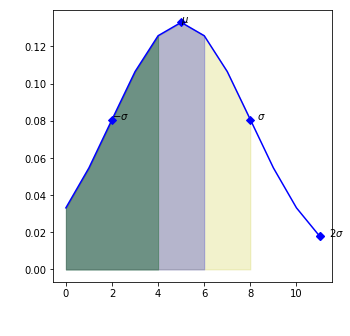

(0.5, 0.74750746245307709, 0.90878878027413212)


In [167]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)

axis_x = range(0,12)

## return the cumulative value from Z-Table
cdf_imd0033_x1_u1 = stats.norm.cdf(x1,media_imd0033_u1, desvio_padrao_imd0033_u1)
cdf_imd0033_x2_u1 = stats.norm.cdf(x2,media_imd0033_u1, desvio_padrao_imd0033_u1)
cdf_imd0033_x3_u1 = stats.norm.cdf(x3,media_imd0033_u1, desvio_padrao_imd0033_u1)

## -2std, -std, std, 2std 
minus2std_imd0033_u1 = media_imd0033_u1 - 2*desvio_padrao_imd0033_u1
minusstd_imd0033_u1 = media_imd0033_u1 - desvio_padrao_imd0033_u1
plus1std_imd0033_u1 = media_imd0033_u1 + desvio_padrao_imd0033_u1
plus2std_imd0033_u1 = media_imd0033_u1 + 2*desvio_padrao_imd0033_u1

## mark points in the plot
markers_points_imd0033_u1 = [minus2std_imd0033_u1, minusstd_imd0033_u1, media_imd0033_u1, 
                             plus1std_imd0033_u1, plus2std_imd0033_u1]

## find the probability distribution function
pdf_imd0033_u1 = stats.norm.pdf(axis_x,media_imd0033_u1,desvio_padrao_imd0033_u1)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0033_u1, '-bD',markevery=markers_points_imd0033_u1)
plt.annotate('$\mu$',xy=(media_imd0033_u1+0,pdf_imd0033_u1[media_imd0033_u1]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0033_u1+0,pdf_imd0033_u1[minus2std_imd0033_u1]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0033_u1+0,pdf_imd0033_u1[minusstd_imd0033_u1]))
plt.annotate('$\sigma$',xy=(plus1std_imd0033_u1+0.3,pdf_imd0033_u1[plus1std_imd0033_u1]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0033_u1+0.4,pdf_imd0033_u1[plus2std_imd0033_u1]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0033_u1[0:x1],color='g',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0033_u1[0:x2],color='b',alpha=.3)
plt.fill_between(axis_x[0:x3], pdf_imd0033_u1[0:x3],color='y',alpha=.2)

plt.show()

print(cdf_imd0033_x1_u1,
cdf_imd0033_x2_u1,
cdf_imd0033_x3_u1)


<h4 style=color:blue>No z-core a nota 5 possui valor negativo (entre 0 e sigma - 1), ou seja, esse aluno tem a chance menor que a ,<br></br><br></br>
média que passar na unidade 1. Diferente das notas 7 e 9 (sigma +1) que é acima da média.<br></br><br></br><br></br><br></br>

Na unidade 1 da turma de imd0033 temos a CDF que aponta a probabilidade da observação aleatória vista em determinado
<br></br><br></br>valor.<p style=color:darkblue> Na nota 5 temos cdf 0.5, e pela tabela de z-score percebemos que 69% de  possibilidade de passarna unidade 1 e nas notas 7 com cdf de 0.74 tem 77% e 9 com cdf 0.90  é 81% referente a média comum </p>
<br></br><br></br></h4>

<h2><i>b) IMD0033 Unidade 2 PROBABI</i<</h2>

In [99]:
# Variáveis Centrais
media_imd0033_u2 = int(round((sum(vetor_alunos_imd0033_u2) / tam_imd0033_u2)))
variancia_imd0033_u2= [(i - media_imd0033_u2) ** 2 for i in vetor_alunos_imd0033_u2]
variancia_final_imd0033_u2 = int(round(sum(variancia_imd0033_u2)/ len(variancia_imd0033_u2)))
desvio_padrao_imd0033_u2 = int(round(variancia_final_imd0033_u2** 0.5))

In [100]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0033_u2)) 
print(len(vetor_alunos_imd0033_u2))
#teste das variaveis centrais
print(media_imd0033_u2,"<<<<<<<<<<<<<<", variancia_imd0033_u2,">>>>>>>>>>>>", variancia_final_imd0033_u2, 
      desvio_padrao_imd0033_u2)


52
52
(4, '<<<<<<<<<<<<<<', [0.25, 0.6399999999999997, 0.3600000000000001, 16.0, 6.25, 16.0, 0.25, 1.0, 16.0, 1.4400000000000004, 4.0, 2.25, 0.25, 4.0, 1.0, 5.760000000000002, 17.639999999999993, 3.2399999999999993, 1.0, 14.44, 4.840000000000001, 16.0, 16.0, 12.959999999999997, 9.609999999999998, 9.0, 2.8900000000000006, 6.25, 16.0, 16.0, 2.25, 16.0, 36.0, 6.25, 16.0, 16.0, 0.0, 1.0, 4.0, 0.0, 0.25, 1.0, 29.160000000000004, 17.639999999999993, 9.609999999999998, 7.290000000000001, 3.2399999999999993, 0.3599999999999996, 0.25, 0.15999999999999992, 7.290000000000001, 0.010000000000000018], '>>>>>>>>>>>>', 8, 3)


<h4 style=color:darkred>Notamos que a média diferente da unidade 1 caiu para <i>4</i></h4>

Populating the interactive namespace from numpy and matplotlib


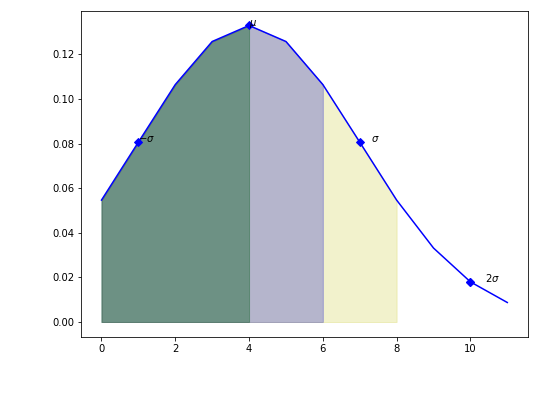

(0.63055865981823633, 0.84134474606854293, 0.9522096477271853)


In [101]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)

axis_x = range(0,12)

## return the cumulative value from Z-Table
cdf_imd0033_x1_u2 = stats.norm.cdf(x1,media_imd0033_u2, desvio_padrao_imd0033_u2)
cdf_imd0033_x2_u2 = stats.norm.cdf(x2,media_imd0033_u2, desvio_padrao_imd0033_u2)
cdf_imd0033_x3_u2 = stats.norm.cdf(x3,media_imd0033_u2, desvio_padrao_imd0033_u2)

## -2std, -std, std, 2std 
minus2std_imd0033_u2 = media_imd0033_u2 - 2*desvio_padrao_imd0033_u2
minusstd_imd0033_u2 = media_imd0033_u2 - desvio_padrao_imd0033_u2
plus1std_imd0033_u2 = media_imd0033_u2 + desvio_padrao_imd0033_u2
plus2std_imd0033_u2 = media_imd0033_u2 + 2*desvio_padrao_imd0033_u2

## mark points in the plot
markers_points_imd0033_u2 = [minus2std_imd0033_u2, minusstd_imd0033_u2, media_imd0033_u2, 
                             plus1std_imd0033_u2, plus2std_imd0033_u2]

## find the probability distribution function
pdf_imd0033_u2 = stats.norm.pdf(axis_x,media_imd0033_u2,desvio_padrao_imd0033_u2)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0033_u2, '-bD',markevery=markers_points_imd0033_u2)
plt.annotate('$\mu$',xy=(media_imd0033_u2+0,pdf_imd0033_u2[media_imd0033_u2]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0033_u2+0,pdf_imd0033_u2[minus2std_imd0033_u2]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0033_u2+0,pdf_imd0033_u2[minusstd_imd0033_u2]))
plt.annotate('$\sigma$',xy=(plus1std_imd0033_u2+0.3,pdf_imd0033_u2[plus1std_imd0033_u2]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0033_u2+0.4,pdf_imd0033_u2[plus2std_imd0033_u2]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0033_u2[0:x1],color='g',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0033_u2[0:x2],color='b',alpha=.3)
plt.fill_between(axis_x[0:x3], pdf_imd0033_u2[0:x3],color='y',alpha=.2)

plt.show()

print(cdf_imd0033_x1_u2,
cdf_imd0033_x2_u2,
cdf_imd0033_x3_u2)

<h4 style=color:darkblue>No z-core a nota 5 possui valor neutro e por isso a média que passa na unidade 2 é comum. Diferente das notas 7 e 9 que é acima da média.

<p style=color:blue>No CDF que aponta a probabilidade da observação aleatória vista em determinado valor. Na nota 5 temos cdf 0.63, ou seja o aluno está dentro dos 73% que podem passar e nas notas 7 com cdf 0.84 = 79% e 9 o cdf 0.95 = 82%. </p>
<h4>

<h2><i>c) IMD0033 Unidade 3 - PROBABILIDA</i<</h2>

In [102]:
# Variáveis Centrais
media_imd0033_u3 = int(round((sum(vetor_alunos_imd0033_u3) / tam_imd0033_u3)))
variancia_imd0033_u3= [(i - media_imd0033_u3) ** 2 for i in vetor_alunos_imd0033_u3]
variancia_final_imd0033_u3 = int(round(sum(variancia_imd0033_u3)/ len(variancia_imd0033_u3)))
desvio_padrao_imd0033_u3 = int(round(variancia_final_imd0033_u3** 0.5))
  

In [103]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0033_u3)) 
print(len(vetor_alunos_imd0033_u3))
#teste das variaveis centrais
print(media_imd0033_u3,"<<<<<<<<<<<<<<", variancia_imd0033_u3,">>>>>>>>>>>>", variancia_final_imd0033_u3, 
      desvio_padrao_imd0033_u3)

52
52
(4, '<<<<<<<<<<<<<<', [0.04000000000000007, 20.25, 16.0, 16.0, 4.409999999999998, 16.0, 9.0, 36.0, 16.0, 9.0, 4.0, 1.0, 10.889999999999999, 1.0, 23.040000000000006, 4.0, 1.6899999999999995, 0.6399999999999997, 16.0, 1.6899999999999995, 16.0, 0.04000000000000007, 16.0, 1.0, 0.0, 6.25, 18.490000000000006, 12.25, 16.0, 16.0, 16.0, 16.0, 36.0, 6.25, 16.0, 16.0, 4.0, 1.0, 4.0, 0.25, 0.04000000000000007, 6.25, 0.49000000000000027, 0.04000000000000007, 0.25, 1.6899999999999995, 6.25, 1.0, 1.0, 7.290000000000001, 0.25, 0.25], '>>>>>>>>>>>>', 9, 3)


<h4 style=color:darkred>Notamos que a variancia aumentou >19 diferentes das unidade o que mostra a distinção das notas dos alunos<i></i></h4>

Populating the interactive namespace from numpy and matplotlib


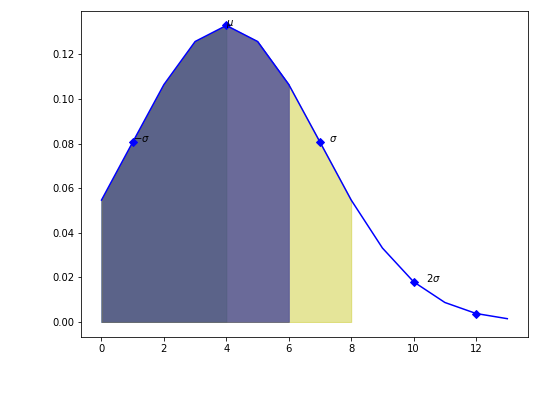

(0.63055865981823633, 0.84134474606854293, 0.9522096477271853)


In [106]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8,6)

axis_x = range(0,14)

## return the cumulative value from Z-Table
cdf_imd0033_x1_u3 = stats.norm.cdf(x1,media_imd0033_u3, desvio_padrao_imd0033_u3)
cdf_imd0033_x2_u3 = stats.norm.cdf(x2,media_imd0033_u3, desvio_padrao_imd0033_u3)
cdf_imd0033_x3_u3 = stats.norm.cdf(x3,media_imd0033_u3, desvio_padrao_imd0033_u3)

## -2std, -std, std, 2std 
minus2std_imd0033_u3 = media_imd0033_u3 - 2*desvio_padrao_imd0033_u3
minusstd_imd0033_u3 = media_imd0033_u3 - desvio_padrao_imd0033_u3
plus1std_imd0033_u3 = media_imd0033_u3 + desvio_padrao_imd0033_u3
plus2std_imd0033_u3 = media_imd0033_u3 + 2*desvio_padrao_imd0033_u3

## mark points in the plot
markers_points_imd0033_u3 = [minus2std_imd0033_u3, minusstd_imd0033_u3, media_imd0033_u3,
                             plus1std_imd0033_u3,plus2std_imd0033_u3]

## find the probability distribution function
pdf_imd0033_u3 = stats.norm.pdf(axis_x,media_imd0033_u3,desvio_padrao_imd0033_u3)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0033_u3, '-bD',markevery=markers_points_imd0033_u3)
plt.annotate('$\mu$',xy=(media_imd0033_u3+0,pdf_imd0033_u3[media_imd0033_u3]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0033_u3+0,pdf_imd0033_u3[minus2std_imd0033_u3]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0033_u3+0,pdf_imd0033_u3[minusstd_imd0033_u3]))
plt.annotate('$\sigma$',xy=(plus1std_imd0033_u3+0.3,pdf_imd0033_u3[plus1std_imd0033_u3]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0033_u3+0.4,pdf_imd0033_u3[plus2std_imd0033_u3]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0033_u3[0:x1],color='g',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0033_u3[0:x2],color='b',alpha=.8)
plt.fill_between(axis_x[0:x3], pdf_imd0033_u3[0:x3],color='y',alpha=.4)

plt.show()

print(cdf_imd0033_x1_u3,
cdf_imd0033_x2_u3,
cdf_imd0033_x3_u3)

<h4 style=color:darkblue>No z-core a nota 5 possui valor neutro e por isso a média que passa na unidade 3 é comum. Diferente das notas 7 e 9 que é acima da média, pulando para Sigma+1, ainda ainda assim demonstra a dificuldade. <br></br><br></br><br></br><br></br>

<h4 style=color:darkred>No CDF que aponta a probabilidade da observação aleatória vista em determinado valor. Na nota 5 temos cdf 0.63 = 73%, as notas 7 com cdf 0.84 = 79% e 9 com cdf de 0.95 = 82%.

</h4>




<h2><i>d) IMD0033 Unidade Média final</i></h2>

In [107]:
# Variáveis Centrais
media_imd0033_mf = int(round((sum(vetor_alunos_imd0033_mf) / tam_imd0033_mf)))
variancia_imd0033_mf= [(i - media_imd0033_mf) ** 2 for i in vetor_alunos_imd0033_mf]
variancia_final_imd0033_mf = int(round(sum(variancia_imd0033_mf)/ len(variancia_imd0033_mf)))
desvio_padrao_imd0033_mf = int(round(variancia_final_imd0033_mf** 0.5))

In [108]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0033_mf)) 
print(len(vetor_alunos_imd0033_mf))
#teste das variaveis centrais
print(media_imd0033_mf,"<<<<<<<<<<<<<<", variancia_imd0033_mf,">>>>>>>>>>>>", variancia_final_imd0033_mf, 
      desvio_padrao_imd0033_mf)

52
52
(5, '<<<<<<<<<<<<<<', [0.16000000000000028, 0.49000000000000027, 0.16000000000000028, 16.0, 0.04000000000000007, 12.96, 2.25, 5.289999999999999, 13.690000000000001, 4.840000000000001, 0.0, 7.290000000000001, 0.16000000000000028, 2.5600000000000005, 8.410000000000002, 0.49000000000000027, 5.760000000000002, 0.009999999999999929, 7.839999999999999, 1.0, 16.81, 0.0899999999999999, 25.0, 0.8100000000000006, 1.4400000000000004, 0.25, 2.25, 6.25, 25.0, 25.0, 17.64, 25.0, 25.0, 0.04000000000000007, 10.889999999999999, 22.090000000000003, 0.04000000000000007, 0.0, 0.3599999999999996, 0.0899999999999999, 0.0899999999999999, 0.0, 3.610000000000001, 2.5599999999999987, 0.8100000000000006, 3.2399999999999993, 0.25, 0.16000000000000028, 1.6899999999999995, 2.25, 0.009999999999999929, 0.0899999999999999], '>>>>>>>>>>>>', 6, 2)


<p style=color:darkblue>Observamos distinções dos valores quanto a média e variância.</p>

Populating the interactive namespace from numpy and matplotlib


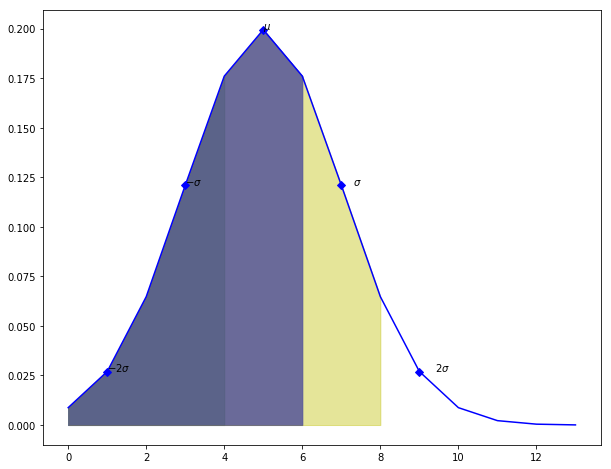

(0.5, 0.84134474606854293, 0.97724986805182079)


In [109]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

axis_x = range(0,14)

## return the cumulative value from Z-Table
cdf_imd0033_x1_mf = stats.norm.cdf(x1,media_imd0033_mf, desvio_padrao_imd0033_mf)
cdf_imd0033_x2_mf = stats.norm.cdf(x2,media_imd0033_mf, desvio_padrao_imd0033_mf)
cdf_imd0033_x3_mf = stats.norm.cdf(x3,media_imd0033_mf, desvio_padrao_imd0033_mf)

## -2std, -std, std, 2std 
minus2std_imd0033_mf = media_imd0033_mf - 2*desvio_padrao_imd0033_mf
minusstd_imd0033_mf = media_imd0033_mf - desvio_padrao_imd0033_mf
plus1std_imd0033_mf = media_imd0033_mf + desvio_padrao_imd0033_mf
plus2std_imd0033_mf = media_imd0033_mf + 2*desvio_padrao_imd0033_mf

## mark points in the plot
markers_points_imd0033_mf = [minus2std_imd0033_mf, minusstd_imd0033_mf, media_imd0033_mf,
                             plus1std_imd0033_mf,plus2std_imd0033_mf]

## find the probability distribution function
pdf_imd0033_mf = stats.norm.pdf(axis_x,media_imd0033_mf,desvio_padrao_imd0033_mf)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0033_mf, '-bD',markevery=markers_points_imd0033_mf)
plt.annotate('$\mu$',xy=(media_imd0033_mf+0,pdf_imd0033_mf[media_imd0033_mf]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0033_mf+0,pdf_imd0033_mf[minus2std_imd0033_mf]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0033_mf+0,pdf_imd0033_mf[minusstd_imd0033_mf]))
plt.annotate('$\sigma$',xy=(plus1std_imd0033_mf+0.3,pdf_imd0033_mf[plus1std_imd0033_mf]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0033_mf+0.4,pdf_imd0033_mf[plus2std_imd0033_mf]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0033_mf[0:x1],color='g',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0033_mf[0:x2],color='b',alpha=.8)
plt.fill_between(axis_x[0:x3], pdf_imd0033_mf[0:x3],color='y',alpha=.4)

plt.show()

print(cdf_imd0033_x1_mf,
cdf_imd0033_x2_mf,
cdf_imd0033_x3_mf)

<h4 style=color:darkgreen>O z-score da media final percebemos que os alunos com nota 5 estão abaixo da média o que aponta para maior probabilidade de reprovação. Quanto as notas 7 e 9 estão acima da média porém não superam +1.5 sigma <br></br><br></br><br></br><br></br>

<h4 style=color:darkred>
Quanto ao CDF percebemos que na nota 5 cdf 0.5 temos 69% de aprovação pela média. Na nota 7 temos cdf de 0.84 = 79% e 9 cdf 0.97 = 83%</h4>

<h2><i>e) Imd0028 Unidade 1 - FMC I</i></h2>

In [110]:
# Variáveis Centrais
media_imd0028_u1 = int(round((sum(vetor_alunos_imd0028_u1) / tam_imd0028_u1)))
variancia_imd0028_u1= [(i - media_imd0028_u1) ** 2 for i in vetor_alunos_imd0028_u1]
variancia_final_imd0028_u1 = int(round(sum(variancia_imd0028_u1)/ len(variancia_imd0028_u1)))
desvio_padrao_imd0028_u1 = int(round(variancia_final_imd0028_u1** 0.5))

In [111]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0028_u1)) 
print(len(vetor_alunos_imd0028_u1))
#teste das variaveis centrais
print(media_imd0028_u1,"<<<<<<<<<<<<<<", variancia_imd0028_u1,">>>>>>>>>>>>", variancia_final_imd0028_u1, 
      desvio_padrao_imd0028_u1)

133
133
(3, '<<<<<<<<<<<<<<', [2.25, 1.0, 9.0, 9.0, 1.4400000000000004, 9.0, 2.25, 0.0, 4.0, 9.0, 6.25, 7.290000000000001, 42.25, 9.0, 9.0, 6.25, 1.0, 9.0, 9.0, 1.0, 9.0, 9.0, 1.0, 4.0, 1.6900000000000002, 9.0, 25.0, 12.25, 0.25, 6.25, 2.25, 1.0, 9.0, 0.25, 16.0, 9.0, 9.0, 1.0, 4.0, 2.25, 0.25, 4.0, 6.25, 6.25, 1.0, 6.25, 12.25, 9.0, 1.4400000000000004, 0.8099999999999998, 1.2100000000000002, 9.0, 5.76, 9.0, 7.290000000000001, 7.290000000000001, 9.0, 1.44, 6.25, 6.25, 5.289999999999999, 3.24, 9.0, 1.0, 2.5600000000000005, 2.8900000000000006, 9.0, 6.760000000000001, 9.0, 5.76, 25.0, 9.0, 9.0, 9.0, 0.0, 9.0, 0.25, 1.0, 2.25, 1.0, 0.0, 2.25, 9.0, 9.0, 9.0, 1.0, 9.0, 9.0, 1.0, 9.0, 6.25, 0.25, 0.25, 4.0, 4.0, 20.25, 9.0, 0.25, 1.0, 2.25, 9.0, 20.25, 1.0, 0.25, 16.0, 25.0, 0.25, 4.0, 4.0, 6.25, 4.0, 9.0, 2.25, 0.25, 9.0, 2.25, 2.25, 16.0, 0.0, 4.41, 3.2399999999999993, 1.0, 5.76, 5.289999999999999, 9.0, 9.0, 9.0, 1.0, 9.0, 9.0, 4.840000000000001, 9.0, 10.889999999999999], '>>>>>>>>>>>>', 6,

<h5 style="color:#156F24">Já podemos observar a média da unidade 1 = 3, a variância = 5 e o desvio padrao = 2. O que deixará o plot diferente, pois os valores são diferentes.</h5>

Populating the interactive namespace from numpy and matplotlib


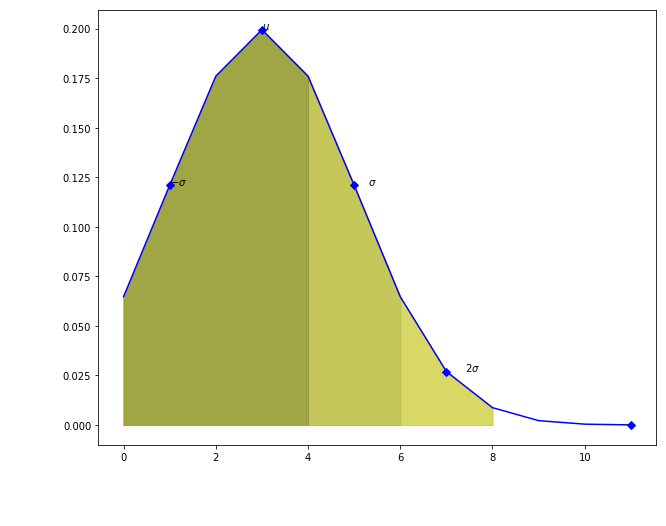

(0.84134474606854293, 0.97724986805182079, 0.9986501019683699)


In [112]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

axis_x = range(0,12)

## return the cumulative value from Z-Table
cdf_imd0028_x1_u1 = stats.norm.cdf(x1,media_imd0028_u1, desvio_padrao_imd0028_u1)
cdf_imd0028_x2_u1 = stats.norm.cdf(x2,media_imd0028_u1, desvio_padrao_imd0028_u1)
cdf_imd0028_x3_u1 = stats.norm.cdf(x3,media_imd0028_u1, desvio_padrao_imd0028_u1)

## -2std, -std, std, 2std 
minus2std_imd0028_u1 = media_imd0028_u1 - 2*desvio_padrao_imd0028_u1
minusstd_imd0028_u1 = media_imd0028_u1 - desvio_padrao_imd0028_u1
plus1std_imd0028_u1 = media_imd0028_u1 + desvio_padrao_imd0028_u1
plus2std_imd0028_u1 = media_imd0028_u1 + 2*desvio_padrao_imd0028_u1

## mark points in the plot
markers_points_imd0028_u1 = [minus2std_imd0028_u1, minusstd_imd0028_u1, media_imd0028_u1, 
                             plus1std_imd0028_u1, plus2std_imd0028_u1]

## find the probability distribution function
pdf_imd0028_u1 = stats.norm.pdf(axis_x,media_imd0028_u1,desvio_padrao_imd0028_u1)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0028_u1, '-bD',markevery=markers_points_imd0028_u1)
plt.annotate('$\mu$',xy=(media_imd0028_u1+0,pdf_imd0028_u1[media_imd0028_u1]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0028_u1+0,pdf_imd0028_u1[minus2std_imd0028_u1]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0028_u1+0,pdf_imd0028_u1[minusstd_imd0028_u1]))
plt.annotate('$\sigma$',xy=(plus1std_imd0028_u1+0.3,pdf_imd0028_u1[plus1std_imd0028_u1]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0028_u1+0.4,pdf_imd0028_u1[plus2std_imd0028_u1]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0028_u1[0:x1],color='#18307B',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0028_u1[0:x2],color='#18307B',alpha=.2)
plt.fill_between(axis_x[0:x3], pdf_imd0028_u1[0:x3],color='y',alpha=.6)

plt.show()

print(cdf_imd0028_x1_u1,
cdf_imd0028_x2_u1,
cdf_imd0028_x3_u1)


<h5 style="color:#0D4530">Analisando o gráfico percebemos o Z- score para as 3 notas de imd0028 da 1ª unidade estão acima da média. NA nota 9 temos um número >+2 sigma da média.

<p></p>
<p style="color:blue">NEssa mesma perpectiva o CDF dos valores aponda que a partir da nota 5 coom cdf 0.84 e 79% de aprovação. Ou seja a chance de um aluno ser aprovado na matéria com nota 5 é bem alta. A partir de 7 o valor com cdf de 0.97 que é 83% e 9 com cdf de 0.99 que é 83%.
</p>
</h5>

<h2><i>f) Imd0028 Unidade 2 - FMC I</i></h2>

In [113]:
# Variáveis Centrais
media_imd0028_u2 = int(round((sum(vetor_alunos_imd0028_u2) / tam_imd0028_u2)
                            ))
variancia_imd0028_u2= [(i - media_imd0028_u2) ** 2 for i in vetor_alunos_imd0028_u2]
variancia_final_imd0028_u2 = int(round(sum(variancia_imd0028_u2)/ len(variancia_imd0028_u2)))
desvio_padrao_imd0028_u2 = int(round(variancia_final_imd0028_u2** 0.5))

In [114]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0028_u2)) 
print(len(vetor_alunos_imd0028_u2))
#teste das variaveis centrais
print(media_imd0028_u2,"<<<<<<<<<<<<<<", variancia_imd0028_u2,">>>>>>>>>>>>", variancia_final_imd0028_u2, 
      desvio_padrao_imd0028_u2)

133
133
(3, '<<<<<<<<<<<<<<', [0.0899999999999999, 1.0, 9.0, 9.0, 2.25, 12.25, 0.15999999999999992, 16.0, 9.0, 9.0, 16.81, 4.0, 18.49, 9.0, 9.0, 11.560000000000002, 0.3600000000000001, 9.0, 9.0, 0.0, 9.0, 9.0, 0.25, 19.360000000000003, 9.0, 9.0, 9.0, 14.44, 9.0, 2.25, 1.0, 1.0, 9.0, 0.25, 2.25, 9.0, 9.0, 6.25, 20.25, 6.25, 9.0, 6.25, 0.0, 6.25, 6.25, 3.24, 1.0, 9.0, 0.04000000000000007, 2.5599999999999987, 2.25, 1.2100000000000002, 9.0, 4.840000000000001, 9.0, 9.0, 3.24, 1.0, 9.0, 4.41, 7.290000000000001, 0.15999999999999992, 9.0, 9.0, 1.44, 32.489999999999995, 9.0, 9.0, 6.25, 9.0, 23.04, 9.0, 9.0, 6.25, 1.0, 9.0, 4.840000000000001, 2.25, 9.0, 0.0, 9.0, 13.690000000000001, 16.0, 9.0, 9.0, 7.839999999999999, 17.64, 12.25, 0.0, 9.0, 4.0, 12.25, 12.25, 6.25, 0.25, 20.25, 9.0, 9.0, 1.0, 0.49000000000000027, 0.25, 1.0, 4.840000000000001, 9.0, 9.0, 2.25, 2.25, 4.0, 1.0, 5.289999999999999, 0.25, 9.0, 9.0, 17.64, 9.0, 0.25, 2.25, 12.25, 0.0, 9.0, 9.0, 5.760000000000002, 9.0, 2.5599999999999987

<h4 style:color:b> Já podemos observar a média arredondada 3 a variância 6 e o desvio padrao 2</h4>

Populating the interactive namespace from numpy and matplotlib


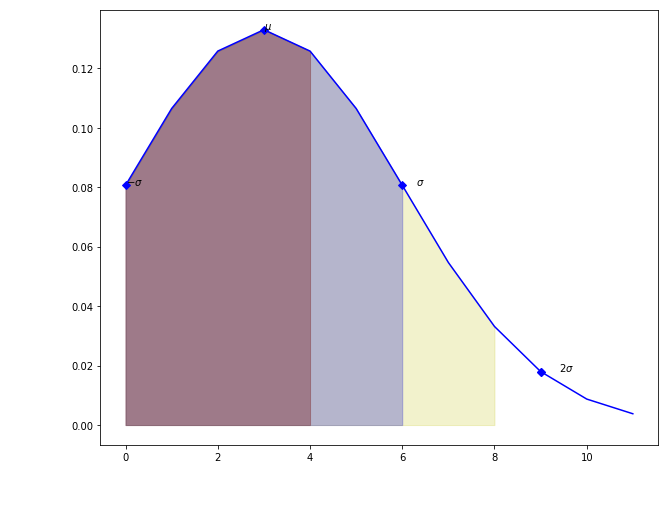

(0.74750746245307709, 0.90878878027413212, 0.97724986805182079)


In [115]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

axis_x = range(0,12)

## return the cumulative value from Z-Table
cdf_imd0028_x1_u2 = stats.norm.cdf(x1,media_imd0028_u2, desvio_padrao_imd0028_u2)
cdf_imd0028_x2_u2 = stats.norm.cdf(x2,media_imd0028_u2, desvio_padrao_imd0028_u2)
cdf_imd0028_x3_u2 = stats.norm.cdf(x3,media_imd0028_u2, desvio_padrao_imd0028_u2)

## -2std, -std, std, 2std 
minus2std_imd0028_u2 = media_imd0028_u2 - 2*desvio_padrao_imd0028_u2
minusstd_imd0028_u2 = media_imd0028_u2 - desvio_padrao_imd0028_u2
plus1std_imd0028_u2 = media_imd0028_u2 + desvio_padrao_imd0028_u2
plus2std_imd0028_u2 = media_imd0028_u2 + 2*desvio_padrao_imd0028_u2

## mark points in the plot
markers_points_imd0028_u2 = [minus2std_imd0028_u2, minusstd_imd0028_u2, media_imd0028_u2, 
                             plus1std_imd0028_u2, plus2std_imd0028_u2]

## find the probability distribution function
pdf_imd0028_u2 = stats.norm.pdf(axis_x,media_imd0028_u2,desvio_padrao_imd0028_u2)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0028_u2, '-bD',markevery=markers_points_imd0028_u2)
plt.annotate('$\mu$',xy=(media_imd0028_u2+0,pdf_imd0028_u2[media_imd0028_u2]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0028_u2+0,pdf_imd0028_u2[minus2std_imd0028_u2]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0028_u2+0,pdf_imd0028_u2[minusstd_imd0028_u2]))
plt.annotate('$\sigma$',xy=(plus1std_imd0028_u2+0.3,pdf_imd0028_u2[plus1std_imd0028_u2]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0028_u2+0.4,pdf_imd0028_u2[plus2std_imd0028_u2]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0028_u2[0:x1],color='#AF3217',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0028_u2[0:x2],color='b',alpha=.3)
plt.fill_between(axis_x[0:x3], pdf_imd0028_u2[0:x3],color='y',alpha=.2)

plt.show()

print(cdf_imd0028_x1_u2,
cdf_imd0028_x2_u2,
cdf_imd0028_x3_u2)

<h5 style="color:#0D4530">Quando ao gráfico os valores se assemelham ao da unidade 1. apontando uma estabilidade.
</h5>

<h2><i>g) Imd0028 Unidade 3 - FMC I</i></h2>

In [116]:
# Variáveis Centrais
media_imd0028_u3 = int(round((sum(vetor_alunos_imd0028_u3) / tam_imd0028_u3)))
variancia_imd0028_u3= [(i - media_imd0028_u3) ** 2 for i in vetor_alunos_imd0028_u3]
variancia_final_imd0028_u3 = int(round(sum(variancia_imd0028_u3)/ len(variancia_imd0028_u3)))
desvio_padrao_imd0028_u3 = int(round(variancia_final_imd0028_u3** 0.5))

In [117]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0028_u3)) 
print(len(vetor_alunos_imd0028_u3))
#teste das variaveis centrais
print(media_imd0028_u3,"<<<<<<<<<<<<<<", variancia_imd0028_u3,">>>>>>>>>>>>", variancia_final_imd0028_u3, 
      desvio_padrao_imd0028_u3)

133
133
(2, '<<<<<<<<<<<<<<', [4.0, 9.0, 1.0, 4.0, 20.25, 16.0, 25.0, 1.0, 4.0, 16.0, 28.09, 30.25, 25.0, 4.0, 4.0, 25.0, 6.25, 4.0, 4.0, 4.0, 47.61000000000001, 4.0, 16.81, 30.25, 4.0, 4.0, 36.0, 9.0, 1.0, 4.0, 4.0, 4.0, 1.0, 4.0, 9.0, 4.0, 4.0, 0.25, 6.25, 4.0, 4.0, 4.0, 0.25, 6.25, 0.25, 4.0, 0.25, 4.0, 9.609999999999998, 4.840000000000001, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 10.889999999999999, 4.0, 4.0, 4.0, 4.0, 25.0, 4.0, 4.0, 16.0, 64.0, 4.0, 17.64, 30.25, 4.0, 4.0, 4.0, 36.0, 42.25, 4.0, 4.0, 30.25, 12.25, 1.0, 46.24000000000001, 4.0, 4.0, 9.0, 12.25, 4.0, 0.0, 2.25, 4.0, 4.0, 1.0, 0.25, 0.0, 16.0, 0.25, 2.25, 30.25, 6.25, 4.0, 0.0, 0.0, 0.25, 0.25, 4.0, 4.0, 6.25, 4.0, 2.25, 1.0, 16.0, 1.0, 4.0, 4.0, 38.43999999999999, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.010000000000000018, 4.0, 12.959999999999997], '>>>>>>>>>>>>', 9, 3)


<h5 style="color:#0D4530">Valores da média e variancia distoantes das demais unidades..
</h5>

Populating the interactive namespace from numpy and matplotlib


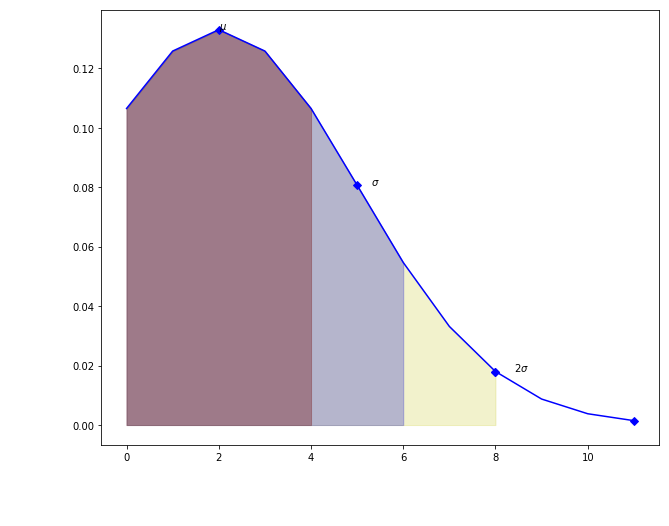

(0.84134474606854293, 0.9522096477271853, 0.99018467137135469)


In [118]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

axis_x = range(0,12)

## return the cumulative value from Z-Table
cdf_imd0028_x1_u3 = stats.norm.cdf(x1,media_imd0028_u3, desvio_padrao_imd0028_u3)
cdf_imd0028_x2_u3 = stats.norm.cdf(x2,media_imd0028_u3, desvio_padrao_imd0028_u3)
cdf_imd0028_x3_u3 = stats.norm.cdf(x3,media_imd0028_u3, desvio_padrao_imd0028_u3)

## -2std, -std, std, 2std 
minus2std_imd0028_u3 = media_imd0028_u3 - 2*desvio_padrao_imd0028_u3
minusstd_imd0028_u3 = media_imd0028_u3 - desvio_padrao_imd0028_u3
plus1std_imd0028_u3 = media_imd0028_u3 + desvio_padrao_imd0028_u3
plus2std_imd0028_u3 = media_imd0028_u3 + 2*desvio_padrao_imd0028_u3

## mark points in the plot
markers_points_imd0028_u3 = [minus2std_imd0028_u3, minusstd_imd0028_u3, media_imd0028_u3, 
                             plus1std_imd0028_u3, plus2std_imd0028_u3]

## find the probability distribution function
pdf_imd0028_u3 = stats.norm.pdf(axis_x,media_imd0028_u3,desvio_padrao_imd0028_u3)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0028_u3, '-bD',markevery=markers_points_imd0028_u3)
plt.annotate('$\mu$',xy=(media_imd0028_u3+0,pdf_imd0028_u3[media_imd0028_u3]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0028_u3+0,pdf_imd0028_u3[minus2std_imd0028_u3]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0028_u3+0,pdf_imd0028_u3[minusstd_imd0028_u3]))
plt.annotate('$\sigma$',xy=(plus1std_imd0028_u3+0.3,pdf_imd0028_u3[plus1std_imd0028_u3]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0028_u3+0.4,pdf_imd0028_u3[plus2std_imd0028_u3]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0028_u3[0:x1],color='#AF3217',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0028_u3[0:x2],color='b',alpha=.3)
plt.fill_between(axis_x[0:x3], pdf_imd0028_u3[0:x3],color='y',alpha=.2)

plt.show()

print(cdf_imd0028_x1_u3,
cdf_imd0028_x2_u3,
cdf_imd0028_x3_u3)

<h5 style="color:#0D4530">Analisando o gráfico percebemos o Z- score para as 3 notas estão acima da média. NA nota 9 temos um número +2 sigma da média.
<p></p><p></p><p></p>
NEssa mesma perpectiva o CDF dos valores aponda que a partir da nota 5 com cdf de 0.84 de 79%. Na nota 7 o valor do cdf é 95 = 82%. Na nota 9 o cdf é 0.99 = 83%.
</h5>

<h2><i>h) Imd0028 Unidade Media FInal - FMC I</i></h2>

In [119]:
# Variáveis Centrais
media_imd0028_mf = int(round((sum(vetor_alunos_imd0028_mf) / tam_imd0028_mf),0))
variancia_imd0028_mf= [(i - media_imd0028_mf) ** 2 for i in vetor_alunos_imd0028_mf]
variancia_final_imd0028_mf = int(round(sum(variancia_imd0028_mf)/ len(variancia_imd0028_mf)-1,0))
desvio_padrao_imd0028_mf = int(round(variancia_final_imd0028_mf** 0.5))

In [120]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0028_mf)) 
print(len(vetor_alunos_imd0028_mf))
#teste das variaveis centrais
print(media_imd0028_mf,"<<<<<<<<<<<<<<", variancia_imd0028_mf,">>>>>>>>>>>>", variancia_final_imd0028_mf, 
      desvio_padrao_imd0028_mf)

133
133
(3, '<<<<<<<<<<<<<<', [2.5600000000000005, 0.25, 4.0, 9.0, 4.409999999999998, 13.690000000000001, 4.0, 4.0, 7.290000000000001, 9.0, 4.0, 7.290000000000001, 24.010000000000005, 9.0, 9.0, 10.889999999999999, 1.0, 9.0, 9.0, 0.49000000000000027, 16.0, 9.0, 5.760000000000002, 12.959999999999997, 5.76, 9.0, 18.49, 9.609999999999998, 1.6899999999999995, 5.289999999999999, 3.24, 2.8899999999999997, 7.290000000000001, 0.0899999999999999, 6.25, 9.0, 9.0, 4.0, 7.290000000000001, 7.290000000000001, 4.840000000000001, 6.25, 4.0, 4.840000000000001, 5.289999999999999, 5.76, 4.0, 9.0, 4.409999999999998, 6.25, 3.61, 5.76, 7.839999999999999, 7.290000000000001, 8.41, 8.41, 6.760000000000001, 2.8899999999999997, 7.839999999999999, 6.25, 7.290000000000001, 2.8899999999999997, 9.0, 5.289999999999999, 3.61, 10.240000000000002, 9.0, 8.41, 7.839999999999999, 7.839999999999999, 21.159999999999997, 9.0, 9.0, 7.839999999999999, 7.290000000000001, 9.0, 4.0, 1.4400000000000004, 6.25, 0.49000000000000027, 4.

Populating the interactive namespace from numpy and matplotlib


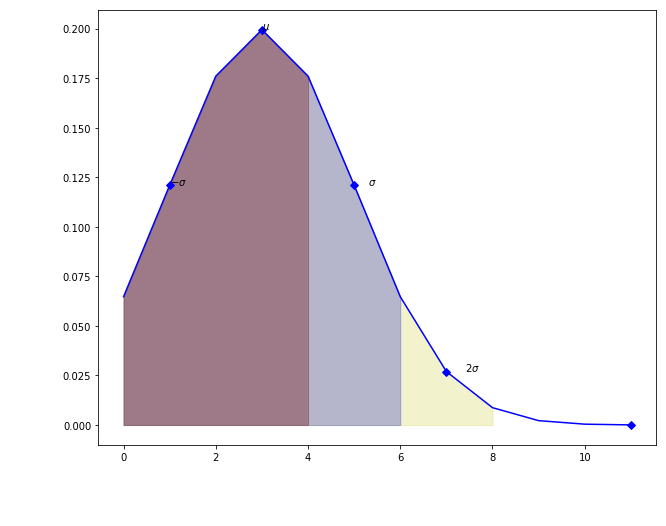

(0.84134474606854293, 0.97724986805182079, 0.9986501019683699)


In [121]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

axis_x = range(0,12)

## return the cumulative value from Z-Table
cdf_imd0028_x1_mf = stats.norm.cdf(x1,media_imd0028_mf, desvio_padrao_imd0028_mf)
cdf_imd0028_x2_mf = stats.norm.cdf(x2,media_imd0028_mf, desvio_padrao_imd0028_mf)
cdf_imd0028_x3_mf = stats.norm.cdf(x3,media_imd0028_mf, desvio_padrao_imd0028_mf)

## -2std, -std, std, 2std 
minus2std_imd0028_mf = media_imd0028_mf - 2*desvio_padrao_imd0028_mf
minusstd_imd0028_mf = media_imd0028_mf - desvio_padrao_imd0028_mf
plus1std_imd0028_mf = media_imd0028_mf + desvio_padrao_imd0028_mf
plus2std_imd0028_mf = media_imd0028_mf + 2*desvio_padrao_imd0028_mf

## mark points in the plot
markers_points_imd0028_mf = [minus2std_imd0028_mf, minusstd_imd0028_mf, media_imd0028_mf, 
                             plus1std_imd0028_mf, plus2std_imd0028_mf]

## find the probability distribution function
pdf_imd0028_mf = stats.norm.pdf(axis_x,media_imd0028_mf,desvio_padrao_imd0028_mf)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0028_mf, '-bD',markevery=markers_points_imd0028_mf)
plt.annotate('$\mu$',xy=(media_imd0028_mf+0,pdf_imd0028_mf[media_imd0028_mf]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0028_mf+0,pdf_imd0028_mf[minus2std_imd0028_mf]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0028_mf+0,pdf_imd0028_mf[minusstd_imd0028_mf]))
plt.annotate('$\sigma$',xy=(plus1std_imd0028_mf+0.3,pdf_imd0028_mf[plus1std_imd0028_mf]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0028_mf+0.4,pdf_imd0028_mf[plus2std_imd0028_mf]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0028_mf[0:x1],color='#AF3217',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0028_mf[0:x2],color='b',alpha=.3)
plt.fill_between(axis_x[0:x3], pdf_imd0028_mf[0:x3],color='y',alpha=.2)

plt.show()

print(cdf_imd0028_x1_mf,
cdf_imd0028_x2_mf,
cdf_imd0028_x3_mf)

<h5 style="color:#0D4530">Analisando o gráfico acima valores semelhantes ao da Unidade 3. Por isso não comentaremos.
</h5>

<h2><i>i) Imd0038 Unidade 1 - FMC II</i></h2>

In [122]:
# Variáveis Centrais
media_imd0038_u1 = int(round((sum(vetor_alunos_imd0038_u1) / tam_imd0038_u1)))
variancia_imd0038_u1= [(i - media_imd0038_u1) ** 2 for i in vetor_alunos_imd0038_u1]
variancia_final_imd0038_u1 = int(round(sum(variancia_imd0038_u1)/ len(variancia_imd0038_u1)))
desvio_padrao_imd0038_u1 = int(round(variancia_final_imd0038_u1** 0.5))

In [123]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0038_u1)) 
print(len(vetor_alunos_imd0038_u1))
#teste das variaveis centrais
print(media_imd0038_u1,"<<<<<<<<<<<<<<", variancia_imd0038_u1,">>>>>>>>>>>>", variancia_final_imd0038_u1, 
      desvio_padrao_imd0038_u1)

81
81
(1, '<<<<<<<<<<<<<<', [4.840000000000001, 1.2100000000000002, 0.0, 0.25, 0.0, 1.0, 0.25, 1.2100000000000002, 0.48999999999999994, 13.690000000000001, 1.4400000000000004, 0.6400000000000001, 7.839999999999999, 0.09000000000000002, 17.64, 3.61, 0.009999999999999995, 0.48999999999999994, 0.009999999999999995, 0.16000000000000003, 0.15999999999999992, 0.25, 0.0, 1.2100000000000002, 0.6400000000000001, 1.0, 1.0, 1.0, 0.009999999999999995, 0.48999999999999994, 1.0, 0.6400000000000001, 2.5600000000000005, 0.0, 0.09000000000000002, 1.0, 0.15999999999999992, 9.609999999999998, 0.6400000000000001, 0.16000000000000003, 2.8900000000000006, 12.959999999999997, 6.760000000000001, 1.0, 1.0, 1.0, 12.25, 0.15999999999999992, 1.0, 1.0, 0.03999999999999998, 4.41, 0.010000000000000018, 25.0, 0.25, 7.839999999999999, 0.15999999999999992, 1.0, 0.03999999999999998, 0.16000000000000003, 0.6400000000000001, 0.6400000000000001, 0.25, 1.0, 1.0, 0.25, 77.44000000000001, 0.009999999999999995, 5.76, 9.0, 1.0,

<h4 style=color:darkblue> Percebemos os valores baixissimos da média = 1, variancia =3 e desvio padrao =2.

Populating the interactive namespace from numpy and matplotlib


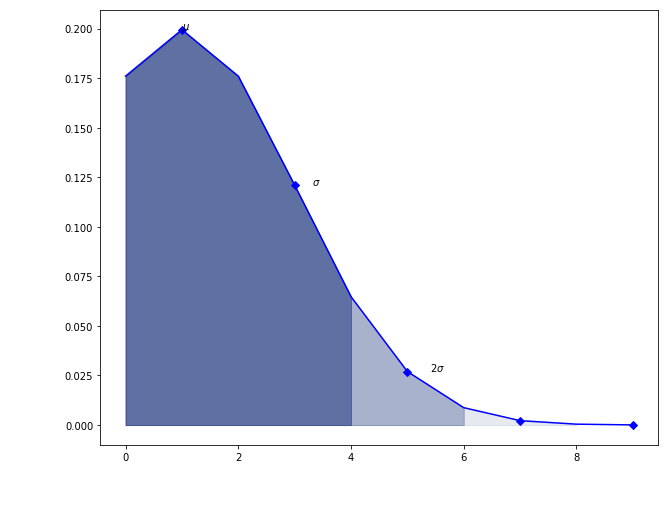

(0.97724986805182079, 0.9986501019683699, 0.99996832875816688)


In [124]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

axis_x = range(0,10)

## return the cumulative value from Z-Table
cdf_imd0038_x1_u1 = stats.norm.cdf(x1,media_imd0038_u1, desvio_padrao_imd0038_u1)
cdf_imd0038_x2_u1 = stats.norm.cdf(x2,media_imd0038_u1, desvio_padrao_imd0038_u1)
cdf_imd0038_x3_u1 = stats.norm.cdf(x3,media_imd0038_u1, desvio_padrao_imd0038_u1)

## -2std, -std, std, 2std 
minus2std_imd0038_u1 = media_imd0038_u1 - 2*desvio_padrao_imd0038_u1
minusstd_imd0038_u1 = media_imd0038_u1 - desvio_padrao_imd0038_u1
plus1std_imd0038_u1 = media_imd0038_u1 + desvio_padrao_imd0038_u1
plus2std_imd0038_u1 = media_imd0038_u1 + 2*desvio_padrao_imd0038_u1

## mark points in the plot
markers_points_imd0038_u1 = [minus2std_imd0038_u1, minusstd_imd0038_u1, media_imd0038_u1, 
                             plus1std_imd0038_u1, plus2std_imd0038_u1]

## find the probability distribution function
pdf_imd0038_u1 = stats.norm.pdf(axis_x,media_imd0038_u1,desvio_padrao_imd0038_u1)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0038_u1, '-bD',markevery=markers_points_imd0038_u1)
plt.annotate('$\mu$',xy=(media_imd0038_u1+0,pdf_imd0038_u1[media_imd0038_u1]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0038_u1+0,pdf_imd0038_u1[minus2std_imd0038_u1]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0038_u1+0,pdf_imd0038_u1[minusstd_imd0038_u1]))
plt.annotate('$\sigma$',xy=(plus1std_imd0038_u1+0.3,pdf_imd0038_u1[plus1std_imd0038_u1]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0038_u1+0.4,pdf_imd0038_u1[plus2std_imd0038_u1]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0038_u1[0:x1],color='#18307B',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0038_u1[0:x2],color='#18307B',alpha=.3)
plt.fill_between(axis_x[0:x3], pdf_imd0038_u1[0:x3],color='#18307B',alpha=.1)

plt.show()

print(cdf_imd0038_x1_u1,
cdf_imd0038_x2_u1,
cdf_imd0038_x3_u1)

<h4 style=color:darkblue> Percebemos um fator diferente em FMC II quem tira 5 tem grande chance de ser aprovado. Só a nota 5 tem +1.5 sigma, acima da média.
<br></br>
<br></br>
<br></br>
Quando ao cdf percebemos o quanto é alto também na nota 5 temos cdf de 0.97 =83% que se estende as outras notas tambeḿ = 83%.
</h4>

<h2><i>i) Imd0038 Unidade 2 - FMC II</i></h2>

In [125]:
# Variáveis Centrais
media_imd0038_u2 = int(round((sum(vetor_alunos_imd0038_u2) / tam_imd0038_u2),0))
variancia_imd0038_u2= [(i - media_imd0038_u2) ** 2 for i in vetor_alunos_imd0038_u2]
variancia_final_imd0038_u2 = int(round(sum(variancia_imd0038_u2)/ len(variancia_imd0038_u2)-1,0))
desvio_padrao_imd0038_u2 = int(round(variancia_final_imd0038_u2** 0.5))

In [126]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0038_u2)) 
print(len(vetor_alunos_imd0038_u2))
#teste das variaveis centrais
print(media_imd0038_u2,"<<<<<<<<<<<<<<", variancia_imd0038_u2,">>>>>>>>>>>>", variancia_final_imd0038_u2, 
      desvio_padrao_imd0038_u2)

81
81
(1, '<<<<<<<<<<<<<<', [57.76, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.4400000000000004, 1.0, 20.25, 1.9599999999999997, 1.0, 29.160000000000004, 1.0, 0.15999999999999992, 0.81, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.81, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 16.0, 1.0, 1.0, 1.0, 4.840000000000001, 0.03999999999999998, 1.0, 1.0, 1.0, 20.25, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 54.760000000000005, 0.6400000000000001, 0.09000000000000002, 6.760000000000001, 21.159999999999997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3600000000000001, 81.0, 1.0, 32.49, 36.0, 1.0, 0.16000000000000003, 1.0, 1.0, 1.0, 1.0, 46.239999999999995, 1.0, 1.0, 1.0, 1.0], '>>>>>>>>>>>>', 5, 2)


Populating the interactive namespace from numpy and matplotlib


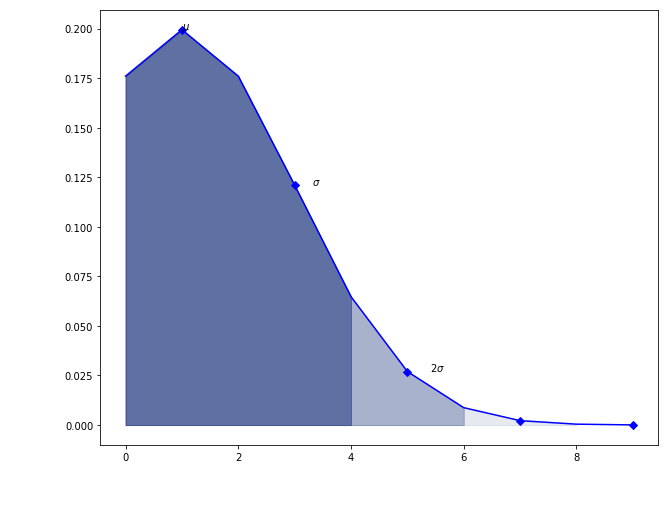

(0.97724986805182079, 0.9986501019683699, 0.99996832875816688)


In [127]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

axis_x = range(0,10)

## return the cumulative value from Z-Table
cdf_imd0038_x1_u2 = stats.norm.cdf(x1,media_imd0038_u2, desvio_padrao_imd0038_u2)
cdf_imd0038_x2_u2 = stats.norm.cdf(x2,media_imd0038_u2, desvio_padrao_imd0038_u2)
cdf_imd0038_x3_u2 = stats.norm.cdf(x3,media_imd0038_u2, desvio_padrao_imd0038_u2)

## -2std, -std, std, 2std 
minus2std_imd0038_u2 = media_imd0038_u2 - 2*desvio_padrao_imd0038_u2
minusstd_imd0038_u2 = media_imd0038_u2 - desvio_padrao_imd0038_u2
plus1std_imd0038_u2= media_imd0038_u2 + desvio_padrao_imd0038_u2
plus2std_imd0038_u2 = media_imd0038_u2 + 2*desvio_padrao_imd0038_u2

## mark points in the plot
markers_points_imd0038_u2 = [minus2std_imd0038_u2, minusstd_imd0038_u2, media_imd0038_u2, 
                             plus1std_imd0038_u2, plus2std_imd0038_u2]

## find the probability distribution function
pdf_imd0038_u2 = stats.norm.pdf(axis_x,media_imd0038_u2,desvio_padrao_imd0038_u2)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0038_u2, '-bD',markevery=markers_points_imd0038_u2)
plt.annotate('$\mu$',xy=(media_imd0038_u2+0,pdf_imd0038_u2[media_imd0038_u2]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0038_u2+0,pdf_imd0038_u2[minus2std_imd0038_u2]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0038_u2+0,pdf_imd0038_u2[minusstd_imd0038_u2]))
plt.annotate('$\sigma$',xy=(plus1std_imd0038_u2+0.3,pdf_imd0038_u2[plus1std_imd0038_u2]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0038_u2+0.4,pdf_imd0038_u2[plus2std_imd0038_u2]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0038_u2[0:x1],color='#18307B',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0038_u2[0:x2],color='#18307B',alpha=.3)
plt.fill_between(axis_x[0:x3], pdf_imd0038_u2[0:x3],color='#18307B',alpha=.1)

plt.show()

print(cdf_imd0038_x1_u2,
cdf_imd0038_x2_u2,
cdf_imd0038_x3_u2)

<h3> Os valores são semelhantes secomparado na unidade I o que demonstra que a matéria continua difícil na unidade posterior
</h3>

<h2><i>i) Imd0038 Unidade 3 - FMC II</i></h2>

In [128]:
# Variáveis Centrais
media_imd0038_u3 = int(round((sum(vetor_alunos_imd0038_u3) / tam_imd0038_u3)))
variancia_imd0038_u3= [(i - media_imd0038_u3) ** 2 for i in vetor_alunos_imd0038_u3]
variancia_final_imd0038_u3 = int(round(sum(variancia_imd0038_u3)/ len(variancia_imd0038_u3)))
desvio_padrao_imd0038_u3 = int(round(variancia_final_imd0038_u3** 0.5))

In [129]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0038_u3)) 
print(len(vetor_alunos_imd0038_u3))
#teste das variaveis centrais
print(media_imd0038_u3,"<<<<<<<<<<<<<<", variancia_imd0038_u3,">>>>>>>>>>>>", variancia_final_imd0038_u3, 
      desvio_padrao_imd0038_u3)

81
81
(1, '<<<<<<<<<<<<<<', [13.690000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.81, 39.69, 1.0, 1.0, 6.25, 1.0, 28.09, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 26.009999999999998, 1.0, 1.0, 1.0, 5.289999999999999, 1.0, 1.0, 1.0, 1.0, 29.160000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 44.89, 1.0, 1.0, 19.360000000000003, 31.359999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 79.21000000000001, 1.0, 34.81, 9.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.64, 1.0, 1.0, 1.0, 1.0], '>>>>>>>>>>>>', 6, 2)


Populating the interactive namespace from numpy and matplotlib


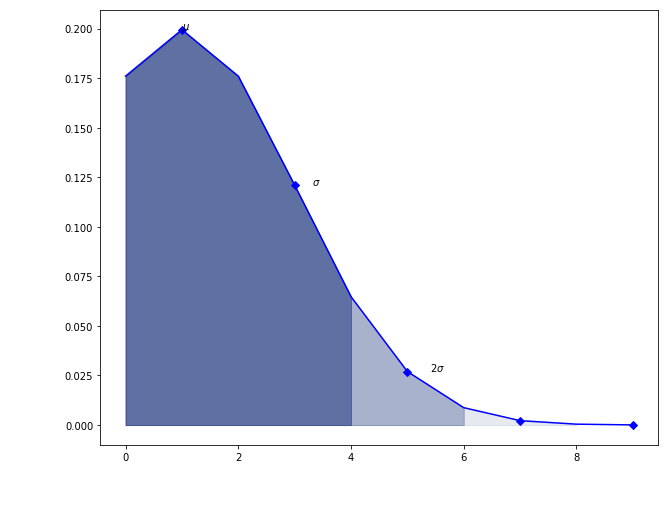

(0.97724986805182079, 0.9986501019683699, 0.99996832875816688)


In [130]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

axis_x = range(0,10)

## return the cumulative value from Z-Table
cdf_imd0038_x1_u3 = stats.norm.cdf(x1,media_imd0038_u3, desvio_padrao_imd0038_u3)
cdf_imd0038_x2_u3 = stats.norm.cdf(x2,media_imd0038_u3, desvio_padrao_imd0038_u3)
cdf_imd0038_x3_u3 = stats.norm.cdf(x3,media_imd0038_u3, desvio_padrao_imd0038_u3)

## -2std, -std, std, 2std 
minus2std_imd0038_u3 = media_imd0038_u3 - 2*desvio_padrao_imd0038_u3
minusstd_imd0038_u3 = media_imd0038_u3 - desvio_padrao_imd0038_u3
plus1std_imd0038_u3= media_imd0038_u3 + desvio_padrao_imd0038_u3
plus2std_imd0038_u3 = media_imd0038_u3 + 2*desvio_padrao_imd0038_u3

## mark points in the plot
markers_points_imd0038_u3 = [minus2std_imd0038_u3, minusstd_imd0038_u3, media_imd0038_u3, 
                             plus1std_imd0038_u3, plus2std_imd0038_u3]

## find the probability distribution function
pdf_imd0038_u3 = stats.norm.pdf(axis_x,media_imd0038_u3,desvio_padrao_imd0038_u3)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0038_u3, '-bD',markevery=markers_points_imd0038_u3)
plt.annotate('$\mu$',xy=(media_imd0038_u3+0,pdf_imd0038_u3[media_imd0038_u3]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0038_u3+0,pdf_imd0038_u3[minus2std_imd0038_u3]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0038_u3+0,pdf_imd0038_u3[minusstd_imd0038_u3]))
plt.annotate('$\sigma$',xy=(plus1std_imd0038_u3+0.3,pdf_imd0038_u3[plus1std_imd0038_u3]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0038_u3+0.4,pdf_imd0038_u3[plus2std_imd0038_u3]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0038_u3[0:x1],color='#18307B',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0038_u3[0:x2],color='#18307B',alpha=.3)
plt.fill_between(axis_x[0:x3], pdf_imd0038_u3[0:x3],color='#18307B',alpha=.1)

plt.show()

print(cdf_imd0038_x1_u3,
cdf_imd0038_x2_u3,
cdf_imd0038_x3_u3)

<h3> Os valores são semelhantes secomparado na unidade I e II o que demonstra que a matéria continua difícil na unidade posterior. Esse detalhe gera curiosidade e demonstra que realmente a matéria tem suas barreiras
</h3>

<h2><i>i) Imd0038 Média Final - FMC II</i></h2>

In [131]:
# Variáveis Centrais
media_imd0038_mf = int(round((sum(vetor_alunos_imd0038_mf) / tam_imd0038_mf)))
variancia_imd0038_mf= [(i - media_imd0038_mf) ** 2 for i in vetor_alunos_imd0038_mf]
variancia_final_imd0038_mf = int(round(sum(variancia_imd0038_mf)/ len(variancia_imd0038_mf)))
desvio_padrao_imd0038_mf = int(round(variancia_final_imd0038_mf** 0.5))

In [132]:
#teste para ver se tamanho de len coincide com tamanho dos valores o vetor***
print(len(variancia_imd0038_mf)) 
print(len(vetor_alunos_imd0038_mf))
#teste das variaveis centrais
print(media_imd0038_mf,"<<<<<<<<<<<<<<", variancia_imd0038_mf,">>>>>>>>>>>>", variancia_final_imd0038_mf, 
      desvio_padrao_imd0038_mf)

81
81
(1, '<<<<<<<<<<<<<<', [20.25, 0.09000000000000002, 0.48999999999999994, 0.6400000000000001, 0.09000000000000002, 1.0, 0.6400000000000001, 0.15999999999999992, 0.81, 23.04, 0.25, 0.81, 25.0, 0.36, 27.040000000000003, 0.0, 0.48999999999999994, 0.81, 0.48999999999999994, 0.6400000000000001, 0.25, 0.6400000000000001, 0.48999999999999994, 0.09000000000000002, 0.81, 1.0, 1.0, 1.0, 0.48999999999999994, 0.81, 1.0, 0.81, 0.009999999999999995, 0.48999999999999994, 0.36, 1.0, 0.25, 16.81, 0.81, 0.6400000000000001, 0.009999999999999995, 16.81, 0.3600000000000001, 1.0, 1.0, 1.0, 20.25, 0.25, 1.0, 1.0, 0.48999999999999994, 0.15999999999999992, 0.36, 40.96000000000001, 0.16000000000000003, 0.25, 19.360000000000003, 20.25, 0.48999999999999994, 0.6400000000000001, 0.81, 0.81, 0.6400000000000001, 1.0, 1.0, 0.09000000000000002, 79.21000000000001, 0.48999999999999994, 22.090000000000003, 16.0, 1.0, 0.09000000000000002, 0.25, 1.0, 1.0, 0.6400000000000001, 25.0, 0.6400000000000001, 1.0, 1.0, 0.4899999

Populating the interactive namespace from numpy and matplotlib


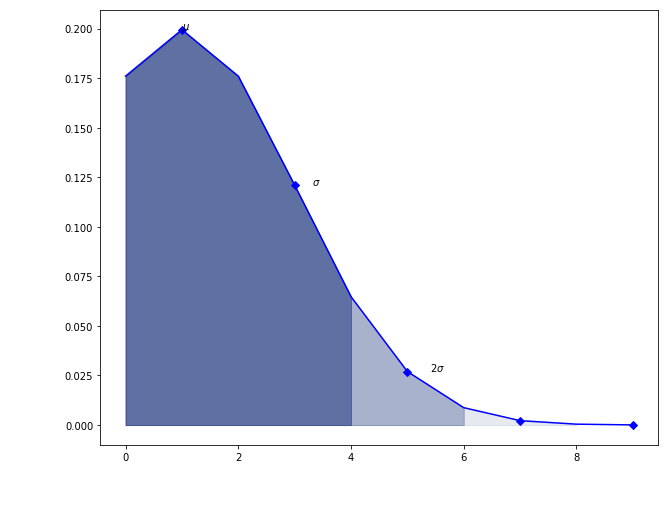

(0.97724986805182079, 0.9986501019683699, 0.99996832875816688)


In [133]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

axis_x = range(0,10)

## return the cumulative value from Z-Table
cdf_imd0038_x1_mf = stats.norm.cdf(x1,media_imd0038_mf, desvio_padrao_imd0038_mf)
cdf_imd0038_x2_mf = stats.norm.cdf(x2,media_imd0038_mf, desvio_padrao_imd0038_mf)
cdf_imd0038_x3_mf = stats.norm.cdf(x3,media_imd0038_mf, desvio_padrao_imd0038_mf)

## -2std, -std, std, 2std 
minus2std_imd0038_mf = media_imd0038_mf - 2*desvio_padrao_imd0038_mf
minusstd_imd0038_mf = media_imd0038_mf - desvio_padrao_imd0038_mf
plus1std_imd0038_mf= media_imd0038_mf + desvio_padrao_imd0038_mf
plus2std_imd0038_mf = media_imd0038_mf + 2*desvio_padrao_imd0038_mf

## mark points in the plot
markers_points_imd0038_mf = [minus2std_imd0038_mf, minusstd_imd0038_mf, media_imd0038_mf, 
                             plus1std_imd0038_mf, plus2std_imd0038_mf]

## find the probability distribution function
pdf_imd0038_mf = stats.norm.pdf(axis_x,media_imd0038_mf,desvio_padrao_imd0038_mf)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf_imd0038_mf, '-bD',markevery=markers_points_imd0038_mf)
plt.annotate('$\mu$',xy=(media_imd0038_mf+0,pdf_imd0038_mf[media_imd0038_mf]))
plt.annotate('$-2\sigma$',xy=(minus2std_imd0038_mf+0,pdf_imd0038_u3[minus2std_imd0038_mf]))
plt.annotate('$-\sigma$',xy=(minusstd_imd0038_mf+0,pdf_imd0038_u3[minusstd_imd0038_mf]))
plt.annotate('$\sigma$',xy=(plus1std_imd0038_mf+0.3,pdf_imd0038_u3[plus1std_imd0038_mf]))
plt.annotate('$2\sigma$',xy=(plus2std_imd0038_mf+0.4,pdf_imd0038_u3[plus2std_imd0038_mf]))

## CDF é a Função de Distribuição Cumulativa cdf[5],[7] e [9] 
plt.fill_between(axis_x[0:x1], pdf_imd0038_mf[0:x1],color='#18307B',alpha=.5)
plt.fill_between(axis_x[0:x2], pdf_imd0038_mf[0:x2],color='#18307B',alpha=.3)
plt.fill_between(axis_x[0:x3], pdf_imd0038_mf[0:x3],color='#18307B',alpha=.1)

plt.show()

print(cdf_imd0038_x1_mf,
cdf_imd0038_x2_mf,
cdf_imd0038_x3_mf)

<h3> Se as 3 unidade anteriores possuiam valores semelhantes é de se esperar que a média também fique equilibrada.
Esses dados reforçam a tese de que se o aluno tiver no minimo notas igual a 5 a chance dele passar é alta, porém as notas mostram individuais são baixas.
</h3>

<h2> Descrição II </h2>

<h3> Fazer gráfico onde: <br></br><br></br><br></br>
-> Eixo X é a média dos alunos de FMC I;
<br></br><br></br>
-> Eixo Y é a média dos Alunos de FMC II:
<br></br><br></br>

(Para toda Série Histórica)
</h3>

Para realizar o proposto utilizaremos a FUnção de Pearsonr. Nela temos do data frame 2 colunas que estão repleta de dados.

Ela função referencia o grau de correlação entre as duas variáveis de escala.
Valores próximos a -1 e +1 essa correlação é forte

    0.9 +ou- a uma correlação muito forte.
    0.7 a 0.9 +ou- uma correlação forte.
    0.5 a 0.7 +ou- uma correlação moderada.
    0.3 a 0.5 +ou- uma correlação fraca.
    0 a 0.3 +ou- uma correlação desprezível.


In [171]:
turma_20141 = pd.read_csv('turmas-2014.1.csv', sep=';')
turma_20142 = pd.read_csv('turmas-2014.2.csv', sep=';')


In [172]:

turma_20171 = pd.read_csv('turmas-2017.1.csv', sep=';')
turma_20172 = pd.read_csv('turmas-2017.2.csv', sep=';')

In [179]:

turma_20161 = pd.read_csv('turmas-2016.1.csv', sep=';')
turma_20162 = pd.read_csv('turmas-2016.2.csv', sep=';')

In [177]:

turma_20152 = pd.read_csv('turmas-2015.2.csv', sep=';')

In [180]:
turma_20151 = pd.read_csv('turmas-2015.1.csv', sep=';')

Variável que especifica os valores da turma

In [221]:
turma = pd.read_csv('matriculas-de-2016.1.csv', sep=';')
print(turma)

        id_turma                          discente     id_curso  unidade  \
0       57594062  069fb15661686bbc75f8c46af09b29ab  115439980.0      1.0   
1       57594062  069fb15661686bbc75f8c46af09b29ab  115439980.0      2.0   
2       57594062  1f266264613dc5fe158a5bb1b1d4c67f  115439980.0      1.0   
3       57594062  1f266264613dc5fe158a5bb1b1d4c67f  115439980.0      2.0   
4       57594062  1f266264613dc5fe158a5bb1b1d4c67f  115439980.0      3.0   
5       57594062  d42ac40a3a626084c01cea55f6841179  115439980.0      1.0   
6       57594062  d42ac40a3a626084c01cea55f6841179  115439980.0      2.0   
7       57594062  d42ac40a3a626084c01cea55f6841179  115439980.0      3.0   
8       57594062  383cea5e8d0a2329a6b1bc1d460d5850  115439980.0      1.0   
9       57594062  383cea5e8d0a2329a6b1bc1d460d5850  115439980.0      2.0   
10      57594062  383cea5e8d0a2329a6b1bc1d460d5850  115439980.0      3.0   
11      57594062  51f85303e4da5d2e658c1de414c8f49e  115439980.0      1.0   
12      5759

D0013 - ELEMENTOS DE MATEMÁTICA PARA COMPUTAÇÃO
DIM0115 - FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I
DIM0400 - ELEMENTOS DE MATEMÁTICA PARA COMPUTAÇÃO
Outros componentes que têm esse componente como pré-requisito IMD0038 - FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II
DIM0121 - FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II
Verificando inúmeros componentes percebeu que não há registro das turmas baseados na tabela componentes. POssa ser que seja nova.

In [216]:
verificar_turmas = imd[(imd['codigo'].str.contains('DIM0400'))]
print(verificar_turmas)

Empty DataFrame
Columns: [id_componente, tipo_componente, codigo, nivel, nome, unidade_responsavel, ch_teorico, ch_pratico, ch_estagio, ch_total, ch_dedicada_docente, ch_ead, cr_max_ead, permite_horario_flexivel, qtd_unidades, procedimentos_avaliacao, equivalencia, pre_requisito, co_requisito, ementa, bibliografia, objetivos, conteudo, competencias_habilidades, referencias, ano_programa, periodo_programa, modalidade, curso_componente]
Index: []

[0 rows x 29 columns]


In [168]:
print(id_turmas_imd0028,

id_turmas_imd0038)

(array([57597592, 57600129, 57600130], dtype=int64), array([57597922, 57597928], dtype=int64))


In [219]:
print(turma_20172)

       id_turma codigo_turma  id_docente_interno  id_docente_externo  \
0      57602445           01           5755233.0                 NaN   
1      57602445           01                 NaN         120983811.0   
2      57602446           01           5757053.0                 NaN   
3      57602447           01           5755233.0                 NaN   
4      57602447           01           5752677.0                 NaN   
5      57602448           01           5753094.0                 NaN   
6      57602450           01           5755233.0                 NaN   
7      57602450           01                 NaN         124613183.0   
8      57602451           01                 NaN         125052419.0   
9      57602451           01           5755233.0                 NaN   
10     57602957           01           5753061.0                 NaN   
11     57602961           01                 NaN         120050657.0   
12     57602962           01           5752714.0                

Observamos que a turma 20141 não possuía as turmas de fmci e fmcii

In [194]:
teste= turma_20141[(turma_20141['id_turma'].isin(id_turmas_imd0028)) ]
print(teste)

Empty DataFrame
Columns: [id_turma, codigo_turma, id_docente_interno, id_docente_externo, observacao, id_componente_curricular, nivel_ensino, campus_turma, local, ano, periodo, data_inicio, data_fim, descricao_horario, total_solicitacoes, capacidade_aluno, tipo, distancia, data_consolidacao, agrupadora, id_turma_agrupadora, qtd_aulas_lancadas, situacao_turma, convenio, modalidade_participantes, Unnamed: 25]
Index: []

[0 rows x 26 columns]


In [218]:
teste3= turma_20151[(turma_20151['id_turma'].isin(id_turmas_imd0028)) ]
print(teste3)
teste4= turma_20152[(turma_20152['id_turma'].isin(id_turmas_imd0028)) ]
print(teste4)
teste5= turma_20161[(turma_20161['id_turma'].isin(id_turmas_imd0028)) ]
print(teste5)
teste6= turma_20162[(turma_20162['id_turma'].isin(id_turmas_imd0028)) ]
print(teste6)
teste7= turma_20171[(turma_20171['id_turma'].isin(id_turmas_imd0028)) ]
print(teste7)
teste8= turma_20172[(turma_20172['id_turma'].isin(id_turmas_imd0028)) ]
print(teste8)

Empty DataFrame
Columns: [id_turma, codigo_turma, id_docente_interno, id_docente_externo, observacao, id_componente_curricular, nivel_ensino, campus_turma, local, ano, periodo, data_inicio, data_fim, descricao_horario, total_solicitacoes, capacidade_aluno, tipo, distancia, data_consolidacao, agrupadora, id_turma_agrupadora, qtd_aulas_lancadas, situacao_turma, convenio, modalidade_participantes, Unnamed: 25]
Index: []

[0 rows x 26 columns]
Empty DataFrame
Columns: [id_turma, codigo_turma, id_docente_interno, id_docente_externo, observacao, id_componente_curricular, nivel_ensino, campus_turma, local, ano, periodo, data_inicio, data_fim, descricao_horario, total_solicitacoes, capacidade_aluno, tipo, distancia, data_consolidacao, agrupadora, id_turma_agrupadora, qtd_aulas_lancadas, situacao_turma, convenio, modalidade_participantes, Unnamed: 25]
Index: []

[0 rows x 26 columns]
Empty DataFrame
Columns: [id_turma, codigo_turma, id_docente_interno, id_docente_externo, observacao, id_compone

Especificando turmas

In [222]:
turmas_fmci_20141 =  turma_20141[
    (turma_20141['situacao_turma'] != 'CANCELADO') & 
     (turma_20141['situacao_turma']!='EXCLUÍDA')& (turma_20141['situacao_turma']!='DESISTENCIA')
& (turma_20141['situacao_turma']!='TRANCADO')
    &(turma_20141['id_turma'].isin(id_turmas_imd0028)) ]
drop_matriculas.head()

print(turmas_fmci_20141.loc[22590000:57599999])





Empty DataFrame
Columns: [id_turma, codigo_turma, id_docente_interno, id_docente_externo, observacao, id_componente_curricular, nivel_ensino, campus_turma, local, ano, periodo, data_inicio, data_fim, descricao_horario, total_solicitacoes, capacidade_aluno, tipo, distancia, data_consolidacao, agrupadora, id_turma_agrupadora, qtd_aulas_lancadas, situacao_turma, convenio, modalidade_participantes, Unnamed: 25]
Index: []

[0 rows x 26 columns]


<h3> Depois de inumeros testes percebemos que de alguma forma falta dados na tabela dos componentes do id_turma. E então os dados só poderão ser feitos pelo 2017.1

In [230]:
print(alunos_imd0028_u1)

        id_turma                          discente    id_curso  unidade  nota  \
208193  57600130  51a920b9ab104a241c04fe06fcd5351d  92127264.0      1.0   1.5   
208196  57600130  52cb0901c1ba8d1785ead505c2561fab  92127264.0      1.0   2.0   
208199  57600130  8463c2535fac97abe4249e39c4daf7d4  92127264.0      1.0   0.0   
208202  57600130  9ec603a1d9e64235ad54f24eb202dbde  92127264.0      1.0   0.0   
208205  57600130  15ce11b7e21c47c687f7008c288e12b5  92127264.0      1.0   4.2   
208208  57600130  dee9b933efd2e10c6707a994619cce6e  92127264.0      1.0   0.0   
208211  57600130  c4356f369c147e433dd38aa9fd4b117e  92127264.0      1.0   4.5   
208214  57600130  8ca3409114db642aaeaebe4c0c0d4443  92127264.0      1.0   3.0   
208217  57600130  63a082d54912829c3791dde3e907f3ff  92127264.0      1.0   1.0   
208220  57600130  2d46502091a65749687e7a1bceeefd49  92127264.0      1.0   6.0   
208223  57600130  e1366b1c58c910fbd4c781cb01782b57  92127264.0      1.0   0.5   
208226  57600130  a58edd3bb1

Criando o novo Data Frame com todos os valores

In [232]:
from scipy.stats.stats import pearsonr

# The pearsonr function will find the correlation between two columns of data.
# It returns the r value and the p value.  We'll learn more about p values later on.
r, p_value = pearsonr(alunos_imd0028_u1["nota"], alunos_imd0038_u1["nota"])

# As we can see, this is a very high positive r value - it's close to 1.
print(r,p_value)


ValueError: operands could not be broadcast together with shapes (133,) (81,) 

ZeroDivisionError: float division by zero

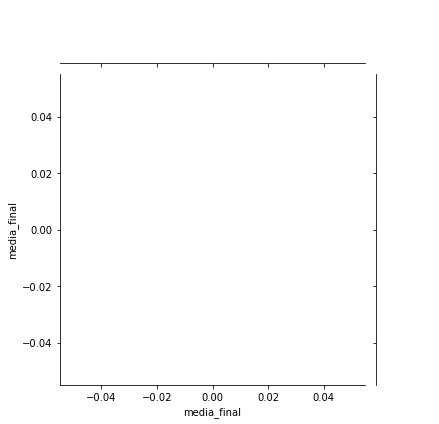

In [223]:
sns.jointplot(alunos_imd0028_u1["media_final"], alunos_imd0038_u1["media_final"])

plt.show()